<a href="https://colab.research.google.com/github/iksungjeon/gpt_visual/blob/main/SKT_SKB_GPT3_5%ED%99%9C%EC%9A%A9_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94_%EA%B3%BC%EC%A0%95(%EC%88%98%EA%B0%95%EC%83%9D%EC%9A%A9)_ipynb_%EA%BC%AD_%EC%82%AC%EB%B3%B8%EC%A0%80%EC%9E%A5_%ED%9B%84_%EC%82%AC%EC%9A%A9%ED%95%B4%EC%A3%BC%EC%84%B8%EC%9A%94%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. 글꼴 설치하기

<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EC%B0%B8%EA%B3%A0%EC%9E%90%EB%A3%8C.png" width = "200">

❤️ **0-1**
* 뒤에 시각화 파트를 진행할 때 한글 데이터는 모두 깨져서 보일 수 있기 때문에 우선 글꼴을 설치해봅시다.
* 나중에 혼자서 하실때도 아래 코드를 복사하셔서 실행하시면 됩니다.

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123630 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf: NanumSquareRound,나눔스퀘어라운드,NanumSquareRound Bold,나눔스퀘어라운드 Bold:style=Bold,Regular
/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf: NanumGothicCoding,나눔고딕코딩:style=Bold
/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf: NanumSquareRound,나눔스퀘어라운드,NanumSquareRound Regular,나눔스퀘어라운드 Regular:style=Regular
/usr/share/fonts/truetype/nanum/NanumSquareB.ttf: NanumSquare,나눔스퀘어,NanumSquare Bold,나눔스퀘어 Bold:style=Bold
/usr/share/fo

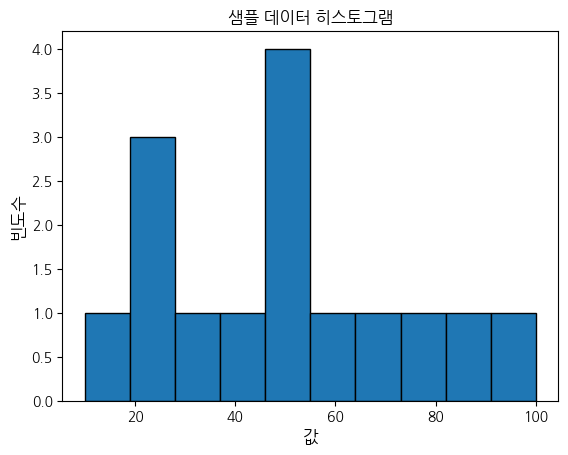

In [1]:
# 나눔 고딕 폰트 설치
!apt-get update -qq
!apt-get install -qq fonts-nanum

# 설치된 폰트 확인
!fc-list :lang=ko

# matplotlib의 폰트 캐시를 삭제하고 새로 고침
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔 고딕 폰트를 matplotlib에 등록
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=12)

# 폰트 캐시를 갱신하고 나눔 고딕을 기본 폰트로 설정
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

# 한글이 잘 나오는지 확인
data = [10, 20, 20, 20, 30, 40, 50, 50, 50, 50, 60, 70, 80, 90, 100]

plt.hist(data, bins=10, edgecolor='black')
plt.title('샘플 데이터 히스토그램', fontproperties=fontprop)
plt.xlabel('값', fontproperties=fontprop)
plt.ylabel('빈도수', fontproperties=fontprop)

# 그래프 보여주기
plt.show()



---



# 1. 파일 업로드하기

<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EB%AC%B8%EC%A0%9C.png" width = "220">

❤️ **1-1**

* 노션에 있는 실습 파일 다운로드 받아봅시다.
* 실제 상황에서는 여러개의 파일(예: 여러 연도별, 월별, 지역별 파일 등)이 있을 수 있는데 이 파일들을 한번에 합쳐서 업로드해봅시다.
* 처음이니 코드를 드려보겠습니다! **아래 코드를 실행시킨 후 버튼이 생기면 버튼을 눌러 내 데이터를 모두 선택하고, 업로드해봅시다.**
* 이코드는 저장해두고 나중에도 파일 업로드시 활용하시면 됩니다.

In [3]:
import pandas as pd
from google.colab import files

# 파일 업로드
uploaded_files = files.upload()

# 업로드한 파일들을 하나의 dfs 리스트에 저장하기
dfs = []
for filename in uploaded_files.keys():
    df = pd.read_csv(filename)
    dfs.append(df)

Saving TC_GS_YGMN_CNSMP_20201218112905_57.csv to TC_GS_YGMN_CNSMP_20201218112905_57 (1).csv
Saving TC_GS_YGMN_CNSMP_20201218112905_58.csv to TC_GS_YGMN_CNSMP_20201218112905_58.csv
Saving TC_GS_YGMN_CNSMP_20201218112905_59.csv to TC_GS_YGMN_CNSMP_20201218112905_59.csv
Saving TC_GS_YGMN_CNSMP_20201218112905_60.csv to TC_GS_YGMN_CNSMP_20201218112905_60.csv
Saving TC_GS_YGMN_CNSMP_20201218112905_61.csv to TC_GS_YGMN_CNSMP_20201218112905_61.csv
Saving TC_GS_YGMN_CNSMP_20201218112905_62.csv to TC_GS_YGMN_CNSMP_20201218112905_62.csv
Saving TC_GS_YGMN_CNSMP_20201218112905_63.csv to TC_GS_YGMN_CNSMP_20201218112905_63.csv
Saving TC_GS_YGMN_CNSMP_20201218112905_64.csv to TC_GS_YGMN_CNSMP_20201218112905_64.csv
Saving TC_GS_YGMN_CNSMP_20201218112905_65.csv to TC_GS_YGMN_CNSMP_20201218112905_65.csv
Saving TC_GS_YGMN_CNSMP_20201218112905_66.csv to TC_GS_YGMN_CNSMP_20201218112905_66.csv
Saving TC_GS_YGMN_CNSMP_20201218112905_67.csv to TC_GS_YGMN_CNSMP_20201218112905_67.csv
Saving TC_GS_YGMN_CNSMP_2020

<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EB%AC%B8%EC%A0%9C.png" width = "220">

❤️ **1-2**
* 업로드한 데이터를 하나의 파일로 합쳐봅시다.


<img src = "https://datadiving.net/wp-content/uploads/2024/03/chatGPT.png" width = "223">

🤖 **ChatGPT 프롬프트**

나는 월별 카드 결제내역 기반으로 경기도 지역별 청년 소비 현황을 알 수 있는 데이터를 파이썬으로 분석해보려고 해.

툴은 구글 코랩을 사용할거야.
먼저 데이터를 파이썬에 임포트 해서 dfs에 저장했어.

이걸 어떻게 합칠 수 있을지 코드를 알려줘.

In [11]:
#여기에 코드를 입력해주세요.

import pandas as pd
import os

# 코랩 작업 디렉토리에 저장된 파일들의 이름을 가져오기
file_names = [file for file in os.listdir() if file.endswith('.csv')]

# 각 파일의 데이터를 읽어서 리스트에 저장
dfs = []
for file_name in file_names:
    df = pd.read_csv(file_name)
    dfs.append(df)

# 데이터 병합
merged_df = pd.concat(dfs, ignore_index=True)

# 병합된 데이터 확인
print("병합된 데이터의 첫 5행:")
print(merged_df.head())

# 병합된 데이터를 하나의 CSV 파일로 저장
merged_df.to_csv('merged_data.csv', index=False)
print("병합된 파일이 'merged_data.csv'로 저장되었습니다.")

병합된 데이터의 첫 5행:
      기준년월  시도명     시군구명 성별코드         사용금액  카드사명
0  2019-08  경기도      구리시    F  21624595781   NaN
1  2019-08  경기도      부천시    F  84255407015   NaN
2  2019-08  경기도      안성시    M  29072374854   NaN
3  2019-08  경기도     동두천시    M   8578933369   NaN
4  2019-08  경기도  용인시 기흥구    M  59227403957   NaN
병합된 파일이 'merged_data.csv'로 저장되었습니다.


<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EB%AC%B8%EC%A0%9C.png" width = "220">

❤️ **1-3**
* 데이터가 잘 병합되었는지 확인해볼까요?

<img src = "https://datadiving.net/wp-content/uploads/2024/03/chatGPT.png" width = "223">

🤖 **ChatGPT 프롬프트**

잘 합쳐졌는지 보기 위해 데이터를 100행마다 1개씩 뽑아서 총 50행 정도를 확인해보고 싶어.

In [12]:
#여기에 코드를 입력해주세요.
# 데이터에서 100행마다 1개씩 추출
sampled_data = merged_df.iloc[::100]  # 100행 간격으로 데이터 추출

# 샘플링된 데이터에서 최대 50행까지만 표시
sampled_data = sampled_data.head(50)

# 샘플링된 데이터 출력
print("샘플링된 데이터 (100행마다 1개, 최대 50행):")
print(sampled_data)

# 샘플링된 데이터를 CSV로 저장 (필요시)
sampled_data.to_csv('sampled_data.csv', index=False)
print("샘플링된 데이터가 'sampled_data.csv'로 저장되었습니다.")

샘플링된 데이터 (100행마다 1개, 최대 50행):
         기준년월  시도명      시군구명 성별코드          사용금액  카드사명
0     2019-08  경기도       구리시    F   21624595781   NaN
100   2020-07  경기도       안성시    F   13280258023   NaN
200   2019-08  경기도  고양시 일산동구    M   56271937950   NaN
300   2019-12  경기도   성남시 분당구    M  799590013638   NaN
400   2019-10  경기도   안양시 동안구    F   42731710487   NaN
500   2020-04  경기도       가평군    M   10447227147   NaN
600   2020-02  경기도   성남시 분당구    M  782978353521   NaN
700   2019-09  경기도       양주시    F   14280893465   NaN
800   2020-01  경기도       시흥시    M   66913391244   NaN
900   2020-06  경기도   안산시 단원구    M   53150242042   NaN
1000  2019-11  경기도       광주시    M   43931501114   NaN
1100  2020-08  경기도       구리시    F   19166977206   NaN
샘플링된 데이터가 'sampled_data.csv'로 저장되었습니다.




---



# 2. 데이터 탐색 및 전처리

<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EB%AC%B8%EC%A0%9C.png" width = "220">

❤️ **2-1**
* 데이터가 잘 병합되었다면, 본격적으로 데이터를 어떻게 전처리하고 탐색하면 좋을까요? 챗GPT에게 제안받아 봅시다.
* 직접적인 코드뿐 만 아니라 데이터분석의 방향성을 설정할 때도 챗GPT의 도움을 받는 것은 유용합니다.

<img src = "https://datadiving.net/wp-content/uploads/2024/03/chatGPT.png" width = "223">

🤖 **ChatGPT 프롬프트**

         기준년월  시도명     시군구명 성별코드         사용금액  카드사명
0     2019-08  경기도      구리시    F  21624595781   NaN
100   2019-09  경기도      연천군    F   1391163785   NaN
200   2019-10  경기도  수원시 영통구    F  36787848328   NaN
300   2019-11  경기도      양평군    M   9835969794   NaN
400   2019-12  경기도      부천시    F  85483995470   NaN
500   2020-01  경기도      광명시    M  64951623251   NaN
600   2020-03  경기도     동두천시    F   4322686283   NaN
700   2020-04  경기도  용인시 수지구    M  35630058996   NaN
800   2020-05  경기도  용인시 기흥구    F  29035135012   NaN
900   2020-06  경기도  안산시 단원구    M  53150242042   NaN
1000  2020-07  경기도  용인시 처인구    F  19324310842   NaN

샘플로 알려준 데이터셋을 위와 같아.
나는 이렇게 생긴 데이터를 분석하여 청년층에 최적화된 통신사 연계 상품 개발시 인사이트를 얻고 싶은 상황이야.

지금부터 데이터 탐색, 데이터 전처리, 데이터 시각화, 인사이트 도출 순서대로 데이터 분석을 하려고 하는데 우선 데이터 탐색과 전처리 단계에 어떤 작업들을 하면 좋을지 제안해줘.

In [16]:
# 챗GPT가 제안해준 작업들

# 데이터 탐색:

# 데이터의 기본 특성 파악: 데이터의 크기, 열의 개수, 각 열의 데이터 타입 등을 확인합니다.
# 결측치 확인: 각 열별로 결측치가 있는지 확인하고, 결측치를 어떻게 처리할지 결정합니다.
# 이상치 확인: 사용금액 등의 변수에서 이상치가 있는지 확인하여 필요에 따라 처리합니다.
# 각 열의 유니크한 값 확인: 시도명, 시군구명, 성별코드, 카드사명 등의 열에 어떤 값이 있는지 확인합니다.
# 데이터 전처리:

# 결측치 처리: 결측치가 있는 경우 해당 행을 제거하거나, 평균값이나 중앙값으로 대체합니다.
# 데이터 타입 변환: 필요한 경우 날짜 데이터를 파이썬의 datetime 형식으로 변환합니다.
# 카테고리 데이터 인코딩: 성별코드와 같이 문자열 형태의 카테고리 데이터를 숫자로 인코딩하여 머신러닝 모델에 적용할 수 있도록 합니다.
# 데이터 필터링: 청년층에 해당하는 데이터만을 추출하여 분석 대상을 좁힙니다. 청년층의 연령대에 대한 정의가 필요할 수 있습니다.
# 이러한 작업을 통해 데이터를 정제하고 필요한 정보를 추출하여 시각화하면 청년 소비 패턴을 더 잘 이해할 수 있으며, 이를 바탕으로 통신사 연계 상품 개발에 도움이 될 수 있습니다.


# 다시 데이터를 로드
uploaded_sampled_data_path = '/content/merged_data.csv'
uploaded_sampled_data = pd.read_csv(uploaded_sampled_data_path)


# 1. 불필요한 열 제거
uploaded_sampled_data = uploaded_sampled_data.drop(columns=['카드사명'])

# 2. 기준년월을 datetime 형식으로 변환
uploaded_sampled_data['기준년월'] = pd.to_datetime(uploaded_sampled_data['기준년월'], format='%Y-%m')

# 3. 기본 통계량 확인
print("기본 통계량:")
print(uploaded_sampled_data['사용금액'].describe())

# 4. 지역별 소비 금액 합계
print("\n지역별 소비 금액 합계:")
print(uploaded_sampled_data.groupby('시도명')['사용금액'].sum())

# 5. 성별 소비 금액 합계
print("\n성별 소비 금액 합계:")
print(uploaded_sampled_data.groupby('성별코드')['사용금액'].sum())

# 6. 시간 흐름에 따른 소비 분석
monthly_usage = uploaded_sampled_data.groupby('기준년월')['사용금액'].sum()
print("\n월별 소비 금액 합계:")
print(monthly_usage)

# 7. 단위 변환 (억 원 단위)
uploaded_sampled_data['사용금액_억'] = uploaded_sampled_data['사용금액'] / 1e8

# 8. 데이터 중복 확인 및 제거
print("\n중복 데이터 여부 확인:")
print(uploaded_sampled_data.duplicated().sum())
uploaded_sampled_data.drop_duplicates(inplace=True)

# 9. 데이터 저장 (전처리 완료 데이터)
uploaded_sampled_data.to_csv('preprocessed_sampled_data.csv', index=False)
print("전처리된 데이터가 'preprocessed_sampled_data.csv'로 저장되었습니다.")

기본 통계량:
count    1.176000e+03
mean     5.823157e+10
std      1.283505e+11
min      1.391164e+09
25%      1.811088e+10
50%      3.200843e+10
75%      5.004720e+10
max      9.561645e+11
Name: 사용금액, dtype: float64

지역별 소비 금액 합계:
시도명
경기도    68480320816931
Name: 사용금액, dtype: int64

성별 소비 금액 합계:
성별코드
F    27975847139121
M    40504473677810
Name: 사용금액, dtype: int64

월별 소비 금액 합계:
기준년월
2019-08-01    9922632665610
2019-09-01    4644165472944
2019-10-01    4919178437279
2019-11-01    5019576804523
2019-12-01    5139541270559
2020-01-01    4712131620448
2020-02-01    4308109634106
2020-03-01    4714173889841
2020-04-01    4708707218615
2020-05-01    5215020699412
2020-06-01    5155285548697
2020-07-01    5098792280858
2020-08-01    4923005274039
Name: 사용금액, dtype: int64

중복 데이터 여부 확인:
84
전처리된 데이터가 'preprocessed_sampled_data.csv'로 저장되었습니다.


<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EB%AC%B8%EC%A0%9C.png" width = "220">

❤️ **2-2**
* 우선 챗GPT가 추천해준 내용처럼 가장 기본적인 데이터 탐색부터 진행해봅시다.

<img src = "https://datadiving.net/wp-content/uploads/2024/03/chatGPT.png" width = "223">

🤖 **ChatGPT 프롬프트**

위에서 합쳐서 새로 만든 데이터의 기본 특성을 파악하기 위한 코드를 알려줘.

In [19]:
import pandas as pd

# 데이터 로드
uploaded_sampled_data_path = '/content/merged_data.csv'
uploaded_sampled_data = pd.read_csv(uploaded_sampled_data_path)

# 1. 불필요한 열 제거
uploaded_sampled_data = uploaded_sampled_data.drop(columns=['카드사명'])

# 2. 기준년월을 datetime 형식으로 변환
uploaded_sampled_data['기준년월'] = pd.to_datetime(uploaded_sampled_data['기준년월'], format='%Y-%m')

# 3. 기본 통계량 확인
print("기본 통계량:")
print(uploaded_sampled_data['사용금액'].describe())

# 4. 지역별 소비 금액 합계
print("\n지역별 소비 금액 합계:")
print(uploaded_sampled_data.groupby('시도명')['사용금액'].sum())

# 5. 성별 소비 금액 합계
print("\n성별 소비 금액 합계:")
print(uploaded_sampled_data.groupby('성별코드')['사용금액'].sum())

# 6. 시간 흐름에 따른 소비 분석
monthly_usage = uploaded_sampled_data.groupby('기준년월')['사용금액'].sum()
print("\n월별 소비 금액 합계:")
print(monthly_usage)

# 7. 단위 변환 (억 원 단위)
uploaded_sampled_data['사용금액_억'] = uploaded_sampled_data['사용금액'] / 1e8

# 8. 데이터 중복 확인 및 제거
print("\n중복 데이터 여부 확인:")
print(uploaded_sampled_data.duplicated().sum())
uploaded_sampled_data.drop_duplicates(inplace=True)

# 9. 데이터 저장 (전처리 완료 데이터)
uploaded_sampled_data.to_csv('preprocessed_sampled_data.csv', index=False)
print("전처리된 데이터가 'preprocessed_sampled_data.csv'로 저장되었습니다.")

기본 통계량:
count    1.176000e+03
mean     5.823157e+10
std      1.283505e+11
min      1.391164e+09
25%      1.811088e+10
50%      3.200843e+10
75%      5.004720e+10
max      9.561645e+11
Name: 사용금액, dtype: float64

지역별 소비 금액 합계:
시도명
경기도    68480320816931
Name: 사용금액, dtype: int64

성별 소비 금액 합계:
성별코드
F    27975847139121
M    40504473677810
Name: 사용금액, dtype: int64

월별 소비 금액 합계:
기준년월
2019-08-01    9922632665610
2019-09-01    4644165472944
2019-10-01    4919178437279
2019-11-01    5019576804523
2019-12-01    5139541270559
2020-01-01    4712131620448
2020-02-01    4308109634106
2020-03-01    4714173889841
2020-04-01    4708707218615
2020-05-01    5215020699412
2020-06-01    5155285548697
2020-07-01    5098792280858
2020-08-01    4923005274039
Name: 사용금액, dtype: int64

중복 데이터 여부 확인:
84
전처리된 데이터가 'preprocessed_sampled_data.csv'로 저장되었습니다.


In [20]:
# 모든 금액을 억 원 단위로 변환
uploaded_sampled_data['사용금액_억'] = uploaded_sampled_data['사용금액'] / 1e8

# 기본 통계량 (억 원 단위)
print("기본 통계량 (억 원 단위):")
print((uploaded_sampled_data['사용금액'] / 1e8).describe())

# 지역별 소비 금액 합계 (억 원 단위)
print("\n지역별 소비 금액 합계 (억 원 단위):")
print(uploaded_sampled_data.groupby('시도명')['사용금액'].sum() / 1e8)

# 성별 소비 금액 합계 (억 원 단위)
print("\n성별 소비 금액 합계 (억 원 단위):")
print(uploaded_sampled_data.groupby('성별코드')['사용금액'].sum() / 1e8)

# 월별 소비 금액 합계 (억 원 단위)
print("\n월별 소비 금액 합계 (억 원 단위):")
print(monthly_usage / 1e8)

기본 통계량 (억 원 단위):
count    1092.000000
mean      581.675865
std      1293.329543
min        13.911638
25%       179.101897
50%       316.445079
75%       499.031753
max      9561.645183
Name: 사용금액, dtype: float64

지역별 소비 금액 합계 (억 원 단위):
시도명
경기도    635190.044841
Name: 사용금액, dtype: float64

성별 소비 금액 합계 (억 원 단위):
성별코드
F    259893.867167
M    375296.177674
Name: 사용금액, dtype: float64

월별 소비 금액 합계 (억 원 단위):
기준년월
2019-08-01    99226.326656
2019-09-01    46441.654729
2019-10-01    49191.784373
2019-11-01    50195.768045
2019-12-01    51395.412706
2020-01-01    47121.316204
2020-02-01    43081.096341
2020-03-01    47141.738898
2020-04-01    47087.072186
2020-05-01    52150.206994
2020-06-01    51552.855487
2020-07-01    50987.922809
2020-08-01    49230.052740
Name: 사용금액, dtype: float64


<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EB%AC%B8%EC%A0%9C.png" width = "220">

❤️ **2-3**
* 데이터 탐색 단계와 데이터 전처리 단계는 무자르듯 무조건적으로 분리되는 것이 아닌, 동시에 왔다갔다 하면서 진행된다고 생각해주시면 됩니다.
* 탐색을 하다보니 카드사 명이 다 [nan]으로 떠있는 것을 보실 수 있죠? 이건 다 비어있는 값이라고 생각해주시면 됩니다.
* 그렇다면 카드사명 column이 굳~이 필요하지 않겠죠?
* 데이터 전처리 단계에서 많이 하는 작업인 필요 없는 열 삭제하기를 진행해봅시다.

<img src = "https://datadiving.net/wp-content/uploads/2024/03/chatGPT.png" width = "223">

🤖 **ChatGPT 프롬프트**

너가 알려준 코드로 보니까 카드사명이 전부 NaN으로 떠있어.

이 column을 아예 삭제할 수 있는 코드를 알려줘.

In [ ]:
#여기에 코드를 입력해주세요.

<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EB%AC%B8%EC%A0%9C.png" width = "220">

❤️ **2-4**
* 챗GPT가 데이터 탐색 단계에서 진행하라고 추천해줬던 두번째 부분인 결측치 확인을 수행해봅시다.
* 위에서 데이터 탐색 단계 진행시, 데이터 타입을 보았을 때 [Non-Null]로 떠있는 것을 보면 결측치가 없는 것 같기는 합니다.
* 하지만 돌다리도 두드려보고 건너기 위해! 다시 한번 더 확인해보겠습니다.
* 남은 결측치가 있는지 한번 살펴볼까요?

<img src = "https://datadiving.net/wp-content/uploads/2024/03/chatGPT.png" width = "223">

🤖 **ChatGPT 프롬프트**

혹시 남은 결측치가 있는지 살펴보고 싶어. 코드를 알려줘

In [ ]:
#여기에 코드를 입력해주세요.

<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EB%AC%B8%EC%A0%9C.png" width = "220">

❤️ **2-5**
* 챗GPT가 데이터 탐색 단계에서 진행하라고 추천해줬던 세번째 부분인 이상치가 있는지 확인해보는 작업을 수행해봅시다.
* 이상치는 분석하는 데이터의 특징이나, 산업 도메인 등에 따라 그 기준이 모두 상이하기 때문에 여기서는 특히나 챗GPT의 대답을 맹신하는 것이 아닌 우리의 비판적인 검토와 요구가 필요한 부분입니다.
* 예를 들면, 오픈한지 얼마 안된 소규모 기업의 홈페이지 일일 방문자 수 데이터에서는 1억이라는 수치가 이상치일 수 있지만 매우 인지도가 높고 활발하게 이용되는 어플리케이션 방문자 수 데이터에서는 1억이라는 수치가 이상치가 아닐 수 있기 때문입니다.

<img src = "https://datadiving.net/wp-content/uploads/2024/03/chatGPT.png" width = "223">

🤖 **ChatGPT 프롬프트**

결측치는 없는 것 같아.

그러면 이번에는 이상치가 있는지 알고 싶어.
어떻게 해야할까?

In [ ]:
#챗GPT가 추천해준 방법

# 이상치를 감지하는 일반적인 방법은 여러 가지가 있습니다. 대표적으로는 이상치를 식별하기 위한 시각화 기법과 통계적인 방법을 사용하는 것이 있습니다.

# 시각화 기법:

# 상자 그림(Boxplot) 또는 산점도(Scatter plot) 등의 시각화 기법을 사용하여 이상치를 확인할 수 있습니다.
# 이상치는 주로 상자 그림에서 박스 바깥에 있는 점들로 나타납니다.
# 통계적 방법:

# 통계적인 방법으로는 평균과 표준편차를 사용하여 이상치를 식별할 수 있습니다.
# 평균에서 너무 멀리 떨어진 데이터 포인트를 이상치로 간주할 수 있습니다.
# Z-점수(Z-score) 또는 IQR(Interquartile Range)을 사용하여 이상치를 식별할 수도 있습니다.
# 아래는 시각화를 통해 이상치를 확인하는 예시 코드입니다.

In [21]:
#여기에 코드를 입력해주세요.
# 이상치 탐지 (IQR 방식)
Q1 = uploaded_sampled_data['사용금액'].quantile(0.25)
Q3 = uploaded_sampled_data['사용금액'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = uploaded_sampled_data[(uploaded_sampled_data['사용금액'] < lower_bound) |
                                 (uploaded_sampled_data['사용금액'] > upper_bound)]

print("이상치 개수:", outliers.shape[0])
print("이상치 데이터:")
print(outliers)

이상치 개수: 67
이상치 데이터:
           기준년월  시도명     시군구명 성별코드          사용금액       사용금액_억
10   2019-08-01  경기도  성남시 분당구    F  714478700325  7144.787003
21   2019-08-01  경기도  성남시 분당구    M  766083017398  7660.830174
27   2019-08-01  경기도      화성시    M  358390337371  3583.903374
61   2019-08-01  경기도      광명시    M   98353855595   983.538556
62   2019-08-01  경기도      부천시    M  117575681530  1175.756815
...         ...  ...      ...  ...           ...          ...
1086 2020-03-01  경기도  성남시 분당구    F  887636767787  8876.367678
1106 2020-08-01  경기도      화성시    F  128013469449  1280.134694
1115 2020-08-01  경기도  성남시 분당구    F  956164518287  9561.645183
1127 2020-08-01  경기도      화성시    M  292768419622  2927.684196
1131 2020-08-01  경기도  성남시 분당구    M  926564482861  9265.644829

[67 rows x 6 columns]


In [25]:
# IQR(사분위수 범위) 방식으로 이상치 탐지
Q1 = uploaded_sampled_data['사용금액'].quantile(0.25)
Q3 = uploaded_sampled_data['사용금액'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 범위 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 데이터 추출
outliers = uploaded_sampled_data[(uploaded_sampled_data['사용금액'] < lower_bound) |
                                 (uploaded_sampled_data['사용금액'] > upper_bound)]

print("이상치 개수:", outliers.shape[0])
print("이상치 데이터:")
print(outliers)

이상치 개수: 67
이상치 데이터:
           기준년월  시도명     시군구명 성별코드          사용금액       사용금액_억   z_score
10   2019-08-01  경기도  성남시 분당구    F  714478700325  7144.787003  5.076910
21   2019-08-01  경기도  성남시 분당구    M  766083017398  7660.830174  5.476097
27   2019-08-01  경기도      화성시    M  358390337371  3583.903374  2.322380
61   2019-08-01  경기도      광명시    M   98353855595   983.538556  0.310862
62   2019-08-01  경기도      부천시    M  117575681530  1175.756815  0.459553
...         ...  ...      ...  ...           ...          ...       ...
1086 2020-03-01  경기도  성남시 분당구    F  887636767787  8876.367678  6.416379
1106 2020-08-01  경기도      화성시    F  128013469449  1280.134694  0.540295
1115 2020-08-01  경기도  성남시 분당구    F  956164518287  9561.645183  6.946477
1127 2020-08-01  경기도      화성시    M  292768419622  2927.684196  1.814760
1131 2020-08-01  경기도  성남시 분당구    M  926564482861  9265.644829  6.717505

[67 rows x 7 columns]


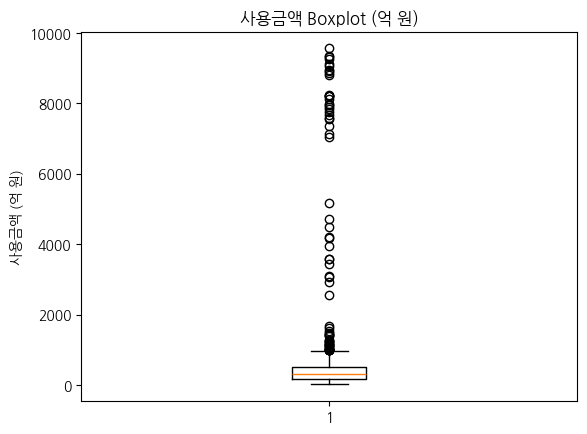

In [22]:
import matplotlib.pyplot as plt

# Boxplot으로 이상치 시각화
plt.boxplot(uploaded_sampled_data['사용금액'] / 1e8)  # 억 원 단위
plt.title('사용금액 Boxplot (억 원)')
plt.ylabel('사용금액 (억 원)')
plt.show()

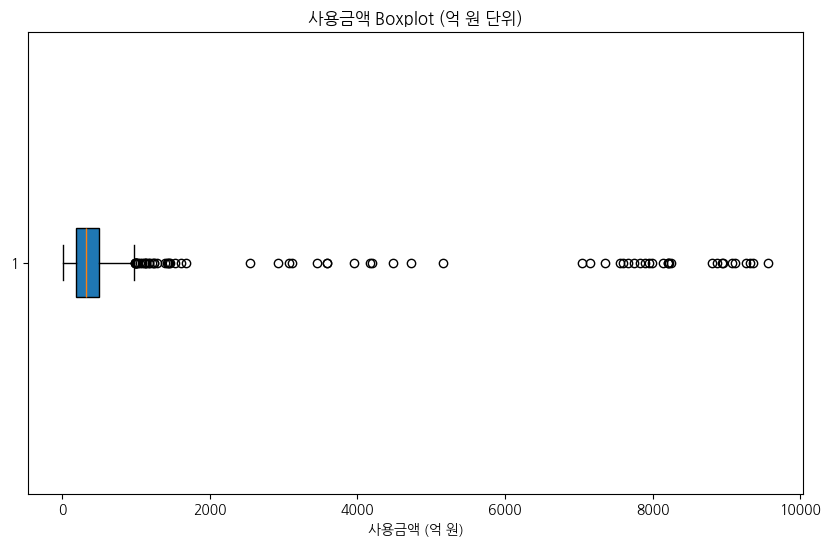

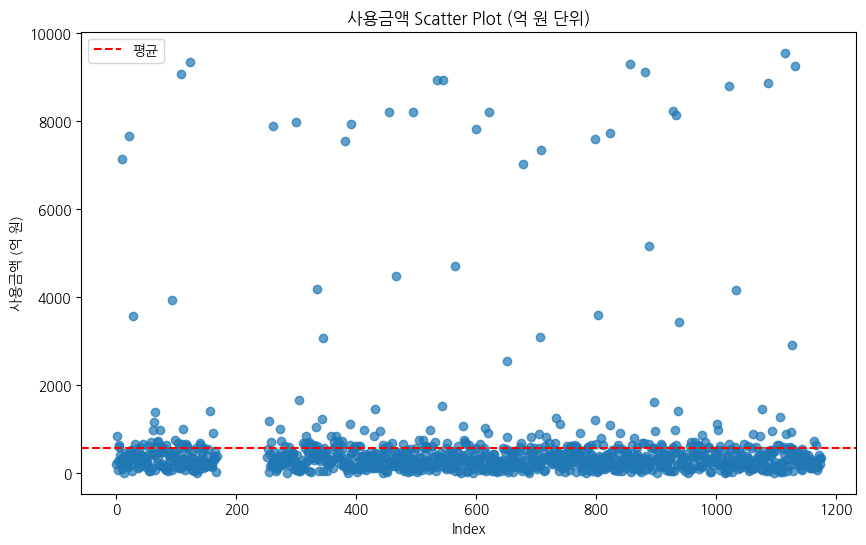

In [24]:
import matplotlib.pyplot as plt

# 1. Boxplot을 사용한 이상치 시각화
plt.figure(figsize=(10, 6))
plt.boxplot(uploaded_sampled_data['사용금액'] / 1e8, vert=False, patch_artist=True)
plt.title('사용금액 Boxplot (억 원 단위)')
plt.xlabel('사용금액 (억 원)')
plt.show()

# 2. 산점도를 사용한 이상치 시각화
plt.figure(figsize=(10, 6))
plt.scatter(uploaded_sampled_data.index, uploaded_sampled_data['사용금액'] / 1e8, alpha=0.7)
plt.axhline(uploaded_sampled_data['사용금액'].mean() / 1e8, color='r', linestyle='--', label='평균')
plt.title('사용금액 Scatter Plot (억 원 단위)')
plt.xlabel('Index')
plt.ylabel('사용금액 (억 원)')
plt.legend()
plt.show()

In [23]:
from scipy.stats import zscore

# Z-Score 계산
uploaded_sampled_data['z_score'] = zscore(uploaded_sampled_data['사용금액'])
outliers_zscore = uploaded_sampled_data[(uploaded_sampled_data['z_score'] > 3) |
                                        (uploaded_sampled_data['z_score'] < -3)]

print("Z-Score 기반 이상치 개수:", outliers_zscore.shape[0])

Z-Score 기반 이상치 개수: 29


In [26]:
from scipy.stats import zscore

# Z-Score 계산
uploaded_sampled_data['z_score'] = zscore(uploaded_sampled_data['사용금액'])

# Z-Score 기준 이상치 추출 (Z-Score > 3 또는 < -3)
zscore_outliers = uploaded_sampled_data[(uploaded_sampled_data['z_score'] > 3) |
                                        (uploaded_sampled_data['z_score'] < -3)]

print("Z-Score 기반 이상치 개수:", zscore_outliers.shape[0])
print("이상치 데이터:")
print(zscore_outliers)

Z-Score 기반 이상치 개수: 29
이상치 데이터:
           기준년월  시도명     시군구명 성별코드          사용금액       사용금액_억   z_score
10   2019-08-01  경기도  성남시 분당구    F  714478700325  7144.787003  5.076910
21   2019-08-01  경기도  성남시 분당구    M  766083017398  7660.830174  5.476097
107  2020-07-01  경기도  성남시 분당구    M  907055800241  9070.558002  6.566595
123  2020-07-01  경기도  성남시 분당구    F  935725296406  9357.252964  6.788369
262  2019-12-01  경기도  성남시 분당구    F  790115943486  7901.159435  5.662004
300  2019-12-01  경기도  성남시 분당구    M  799590013638  7995.900136  5.735291
381  2019-10-01  경기도  성남시 분당구    F  756193563167  7561.935632  5.399597
391  2019-10-01  경기도  성남시 분당구    M  794611943958  7946.119440  5.696783
454  2020-04-01  경기도  성남시 분당구    F  821847328317  8218.473283  5.907463
466  2020-04-01  경기도      화성시    M  447999482059  4479.994821  3.015554
495  2020-04-01  경기도  성남시 분당구    M  821027679295  8210.276793  5.901123
534  2020-05-01  경기도  성남시 분당구    F  894890845999  8948.908460  6.472493
544  2020-05-01  경기도  성남시 분당구    

<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EC%A3%BC%EC%9D%98.png" width = "223">

<주의!!>
**폰트가 깨진다면, `런타임 메뉴>세션 다시 시작 및 모두 실행`을 눌러주세요**
(이때, 위에서 파일 업로드 한 것은 다시 업로드해주어야 합니다.)

<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EB%AC%B8%EC%A0%9C.png" width = "220">

❤️ **2-6**
* 챗GPT가 알려준 이상치 탐지를 위한 코드를 돌렸더니 그래프가 나왔네요!
* 데이터 탐색 단계에서도 이렇게 간단한 그래프를 그려서 데이터의 분포를 파악하고 전처리를 어떻게 할지 방향을 세우는데 활용하기도 합니다. 이는 우리가 뒤에서 할 시각화와 방법은 같지만 목적은 조금 다르다고 할 수 있죠.
* 챗GPT가 그려준 플롯(plot = 그래프, 차트)이 조금 생소하다면 이 플롯을 어떻게 해석할지도 물어볼 수 있습니다.
* 한번 이 플롯으로 어떻게 이상치를 파악할 수 있을지 물어볼까요?

<img src = "https://datadiving.net/wp-content/uploads/2024/03/chatGPT.png" width = "223">

🤖 **ChatGPT 프롬프트**

box plot이 나왔는데 이걸 어떤 방법으로 해석해서 이상치를 파악 할 수 있는 건지 알려줘.

In [ ]:
#챗GPT가 해석해준 내용

# 상자 그림(Boxplot)은 데이터의 분포를 시각화하는 효과적인 방법 중 하나입니다. 이를 통해 이상치를 파악할 수 있습니다. 상자 그림의 주요 구성 요소는 다음과 같습니다.

# 상자(Box): 데이터의 중간 50%인 제1사분위수(Q1)와 제3사분위수(Q3)를 나타냅니다. 따라서 상자의 높이는 데이터의 중간 50% 범위인 IQR(Interquartile Range)를 나타냅니다.
# 수염(Whiskers): 상자 위와 아래에 그려진 선으로, 데이터의 범위를 나타냅니다. 일반적으로 수염의 길이는 1.5배의 IQR에 해당하는 범위를 나타냅니다. 이 범위를 벗어나는 데이터는 이상치로 간주될 수 있습니다.
# 이상치(Outliers): 상자 바깥에 있는 점으로, 상자 그림에서 일반적인 데이터와는 다르게 분포하는 데이터를 나타냅니다.
# 따라서 상자 그림을 해석할 때, 다음과 같은 점에 주의해야 합니다.

# 이상치는 주로 수염 바깥에 있는 점으로 나타납니다. 이 점들은 일반적인 데이터 포인트와는 상당히 멀리 떨어져 있습니다.
# 이상치가 있는 경우, 해당 데이터 포인트가 분석 대상에서 제외될 수 있습니다. 하지만, 이상치가 실제로 데이터의 오류인지 확인해야 합니다. 종종 이상치는 실제로 특이한 상황을 나타내는 경우도 있습니다.
# 따라서 이상치를 식별할 때는 데이터의 특성과 분야 지식을 함께 고려하여 판단하는 것이 중요합니다.

In [27]:
Q1 = uploaded_sampled_data['사용금액'].quantile(0.25)
Q3 = uploaded_sampled_data['사용금액'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("이상치 하한:", lower_bound)
print("이상치 상한:", upper_bound)

이상치 하한: -30079288838.25
이상치 상한: 97892653807.75


In [29]:
import pandas as pd

# 데이터 로드
file_path = '/content/preprocessed_sampled_data.csv'
uploaded_sampled_data = pd.read_csv(file_path)

# IQR 기반 이상치 계산
Q1 = uploaded_sampled_data['사용금액'].quantile(0.25)
Q3 = uploaded_sampled_data['사용금액'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계값 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 추출
outliers = uploaded_sampled_data[(uploaded_sampled_data['사용금액'] < lower_bound) |
                                 (uploaded_sampled_data['사용금액'] > upper_bound)]

# 이상치 개수 및 값 확인
outlier_count = outliers.shape[0]
outlier_values = outliers['사용금액'].tolist()

# 출력
print(f"이상치 개수: {outlier_count}")
print("이상치 값:")
for value in outlier_values:
    print(value)

이상치 개수: 67
이상치 값:
714478700325
766083017398
358390337371
98353855595
117575681530
139004350124
98174683757
394960439549
907055800241
99940359934
935725296406
141362818307
118080674025
790115943486
101179708414
799590013638
167063781376
105357757587
419401546752
123884789874
307115149071
756193563167
112943616201
794611943958
98374949289
145171648347
821847328317
447999482059
821027679295
894890845999
152971190430
893333426974
472142418815
107357702515
782978353521
101938146833
821422702826
254981750932
704222567928
310750088797
735815949440
124867315032
112301150495
122133818571
760002461618
359286263088
110842891742
774716095594
931482263860
912145208949
515796485949
161183263481
824349152949
99538851379
813917282937
142573058597
344644365527
113203326742
99523267441
880482158182
416687685742
146505230065
887636767787
128013469449
956164518287
292768419622
926564482861


<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EB%AC%B8%EC%A0%9C.png" width = "220">

❤️ **2-7**
* 챗GPT가 대답해준 내용에 따르면 수염 바깥에 있는 점이 주로 이상치라고 말해주었는데요, 위에 시각화된 플롯만 보았을때는 수염부분을 벗어나는 이상치가 총 몇개이고 어떤 값인지는 알기가 어렵네요.
* 이 값들을 직접 확인 후에 수염 바깥부분에 있는 값들을 전부 이상치로 처리할지 아니면 이 값들 중 일부만 이상치로 처리할지 결정해봅시다.

<img src = "https://datadiving.net/wp-content/uploads/2024/03/chatGPT.png" width = "223">

🤖 **ChatGPT 프롬프트**

수염 부분을 벗어나는 이상치가 몇개이고, 어떤 값인지 알고 싶어. 코드를 알려줘.

In [ ]:
#여기에 코드를 입력해주세요.

<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EB%AC%B8%EC%A0%9C.png" width = "220">

❤️ **2-8**
* 챗GPT가 알려준 코드로 수염 바깥 부분의 값의 개수와 값을 확인해 보았는데요, 총 34개입니다.
* 이걸 모두 이상치로 판단할 필요는 없을 것 같아서 위에 플롯으로 다시 올라가서 기준을 정해봅시다.
* 저는 이상치의 기준을 사용금액이 0.2(le12) 넘어가는 값들로 정의하려고 합니다.
* 그렇다면 이번에는 이 기준에 맞추어 이상치가 포함된 행을 제거하는 데이터 전처리를 해볼까요?

<img src = "https://datadiving.net/wp-content/uploads/2024/03/chatGPT.png" width = "223">

🤖 **ChatGPT 프롬프트**

사용금액이 0.2 le12 보다 넘어가는 이상치가 포함된 데이터의 행을 없애고 싶어.

In [32]:
#여기에 코드를 입력해주세요.
import pandas as pd

# 데이터 로드
file_path = '/content/preprocessed_sampled_data.csv'
uploaded_sampled_data = pd.read_csv(file_path)

# 사용금액이 2000억 원을 초과하는 행 제거
threshold = 0.2 * 10**12  # 2000억
filtered_data = uploaded_sampled_data[uploaded_sampled_data['사용금액'] <= threshold]

# 제거된 행의 개수 확인
removed_rows_count = uploaded_sampled_data.shape[0] - filtered_data.shape[0]
print(f"제거된 행의 개수: {removed_rows_count}")

# 결과 저장
filtered_data.to_csv('/content/filtered_data.csv', index=False)
print("필터링된 데이터가 'filtered_data.csv'로 저장되었습니다.")

제거된 행의 개수: 39
필터링된 데이터가 'filtered_data.csv'로 저장되었습니다.


<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EB%AC%B8%EC%A0%9C.png" width = "220">

❤️ **2-9**
* 이상치 제거까지 진행되었습니다!
* 그렇다면 잘 제거되었는지 확인하기 위해 지금 데이터가 총 몇행인지 확인해볼까요?

<img src = "https://datadiving.net/wp-content/uploads/2024/03/chatGPT.png" width = "223">

🤖 **ChatGPT 프롬프트**

지금 데이터가 총 몇행인지 알고싶어

In [33]:
#여기에 코드를 입력해주세요.
# 데이터의 총 행 개수 출력
print(f"현재 데이터의 총 행 개수: {filtered_data.shape[0]}")

현재 데이터의 총 행 개수: 1053


<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EB%AC%B8%EC%A0%9C.png" width = "220">

❤️ **2-10**
* 데이터가 이상치가 포함된 행만 적절하게 잘 지워진 것 같네요.
* 데이터를 지울 때는 항상 신중하게 확인을 해봅시다!
* 그 다음으로는 챗GPT가 초반에 추천해주었던 데이터 전처리 방안들 중 데이터 타입 변환을 하라고 했던 부분이 있었는데 기억하시나요?
> `👉 필요한 경우 날짜 데이터를 파이썬의 datetime 형식으로 변환합니다.`
*위로 올라가서 데이터 탐색시 파악한 내용을 확인하고 우선 필요한 부분이 없을지 확인후
> `👉 위쪽에 올라가서 확인해보니, 날짜 데이터가 Object type으로 되어있네요!`
* 필요하다면 데이터 타입 변경 작업을 수행해 봅시다.

<img src = "https://datadiving.net/wp-content/uploads/2024/03/chatGPT.png" width = "223">

🤖 **ChatGPT 프롬프트**

기준년월의 데이터 타입이 object로 되어있는데 datetime 형식으로 변경할 수 있는 코드를 알려줘.

In [34]:
# 기준년월을 datetime 형식으로 변환
filtered_data['기준년월'] = pd.to_datetime(filtered_data['기준년월'], format='%Y-%m-%d')

# 결과 확인
print(f"변환된 데이터 타입:\n{filtered_data.dtypes}")

변환된 데이터 타입:
기준년월      datetime64[ns]
시도명               object
시군구명              object
성별코드              object
사용금액               int64
사용금액_억           float64
dtype: object


<ipython-input-34-5b43f198a1a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['기준년월'] = pd.to_datetime(filtered_data['기준년월'], format='%Y-%m-%d')


<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EB%AC%B8%EC%A0%9C.png" width = "220">

❤️ **2-11**
* 추가로 시군구명에서 시이름만 추출하여 시별로 데이터분석을 하고 싶습니다.
* 챗GPT가 추천해준 내용에는 없지만, 시군구 명에서 시 이름만 추출하여 새로운 column(열)을 만들어볼까요?
* 이때 그냥 시이름을 추출해서 만들어달라고 하는 것이 아니라, 시군구에서 시를 나누는 기준을 적어주는 것이 필요합니다. 왜냐면 GPT3.5버전에서는 우리가 직접 데이터를 챗GPT에 올릴 수 없기 때문에 챗GPT가 데이터가 어떻게 생겼는지 알 수 없기 때문이죠.
* 보통 이런 경우 쉼표나 공백(스페이스) 또는 '/'(슬래시)와 같은 특정 기호들로 구분이 되어있기 때문에 그 부분을 언급해주며 구분해달라고 하면 좋습니다.


<img src = "https://datadiving.net/wp-content/uploads/2024/03/chatGPT.png" width = "223">

🤖 **ChatGPT 프롬프트**

시군구명에서 스페이스 앞부분에 있는 시 이름만 추출해서 '시이름'이라는 열을 만들고 싶어.

In [37]:
#여기에 코드를 입력해주세요.
# 시군구명에서 공백 앞의 시 이름만 추출하여 '시이름' 열 생성
filtered_data['시이름'] = filtered_data['시군구명'].str.split(' ').str[0]

# 결과 확인
print(filtered_data[['시군구명', '시이름']].head())

      시군구명   시이름
0      구리시   구리시
1      부천시   부천시
2      안성시   안성시
3     동두천시  동두천시
4  용인시 기흥구   용인시


<ipython-input-37-5f27bdec4f0c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['시이름'] = filtered_data['시군구명'].str.split(' ').str[0]


<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EB%AC%B8%EC%A0%9C.png" width = "220">

❤️ **2-12**
* 시이름 열이 잘 추출되어 추가되었나요?
* 그렇다면 이제는 필요없는 시도명과 시군구명은 지워봅시다!

<img src = "https://datadiving.net/wp-content/uploads/2024/03/chatGPT.png" width = "223">

🤖 **ChatGPT 프롬프트**

시도명과 시군구명은 없애고 싶어.

In [38]:
#여기에 코드를 입력해주세요.
# 시군구명에서 시 이름만 추출하여 '시이름' 열 생성
filtered_data['시이름'] = filtered_data['시군구명'].str.split(' ').str[0]

# 시도명, 시군구명 열 제거
filtered_data = filtered_data.drop(columns=['시도명', '시군구명'])

# 결과 확인
print(filtered_data.head())

        기준년월 성별코드         사용금액      사용금액_억   시이름
0 2019-08-01    F  21624595781  216.245958   구리시
1 2019-08-01    F  84255407015  842.554070   부천시
2 2019-08-01    M  29072374854  290.723749   안성시
3 2019-08-01    M   8578933369   85.789334  동두천시
4 2019-08-01    M  59227403957  592.274040   용인시


<ipython-input-38-2645aaa8b0df>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['시이름'] = filtered_data['시군구명'].str.split(' ').str[0]


In [39]:
from IPython.display import display

# 데이터프레임 출력
display(filtered_data.head(10))

,기준년월,성별코드,사용금액,사용금액_억,시이름
0,2019-08-01,F,21624595781,216.245958,구리시
1,2019-08-01,F,84255407015,842.554070,부천시
2,2019-08-01,M,29072374854,290.723749,안성시
3,2019-08-01,M,8578933369,85.789334,동두천시
4,2019-08-01,M,59227403957,592.274040,용인시
5,2019-08-01,M,64505919875,645.059199,수원시
6,2019-08-01,F,41875741384,418.757414,수원시
7,2019-08-01,F,32083591176,320.835912,용인시
8,2019-08-01,F,28790234309,287.902343,용인시
9,2019-08-01,F,9214297268,92.142973,의왕시


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['사용금액'].plot(kind='hist', bins=20, title='사용금액')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['사용금액_억'].plot(kind='hist', bins=20, title='사용금액_억')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('성별코드').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('시이름').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='사용금액', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='사용금액', y='사용금액_억', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['사용금액']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('성별코드')):
  _plot_series(series, series_name, i)
  fig.legend(title='성별코드', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('사용금액')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['사용금액']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('시이름')):
  _plot_series(series, series_name, i)
  fig.legend(title='시이름', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('사용금액')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['사용금액_억']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('성별코드')):
  _plot_series(series, series_name, i)
  fig.legend(title='성별코드', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('사용금액_억')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['사용금액_억']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('시이름')):
  _plot_series(series, series_name, i)
  fig.legend(title='시이름', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('사용금액_억')

from matplotlib import pyplot as plt
_df_11['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['사용금액'].plot(kind='line', figsize=(8, 4), title='사용금액')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['사용금액_억'].plot(kind='line', figsize=(8, 4), title='사용금액_억')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['시이름'].value_counts()
    for x_label, grp in _df_14.groupby('성별코드')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('성별코드')
_ = plt.ylabel('시이름')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['성별코드'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='index', y='성별코드', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['시이름'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='index', y='시이름', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['성별코드'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='사용금액', y='성별코드', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['시이름'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='사용금액', y='시이름', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)



---



# 3. 데이터 시각화

<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EB%AC%B8%EC%A0%9C.png" width = "220">

❤️ **3-1**
* 데이터 전처리가 얼추 끝난 것 같습니다. 이번에는 본격적으로 데이터 시각화를 해봅시다!
* 우리가 이번에 데이터 분석을 위한 시각화를 하는 목표는 시이름, 성별, 기준년월별에 따른 소비 금액이나 소비 건수의 관계는 어떻게 되는지 파악하고 이를 토대로 상품개발에 필요한 인사이트를 얻는 것 입니다.
* 시각화를 하려면 내가 알아보고자 하는 내용을 가설로 명확히 하고, 그에 따라 지표들을 x축 y축 등 각 요소에 배치하여 살펴보는 과정이 필요합니다.
* 막막하시죠? 그렇다면 챗GPT의 도움을 받아서 가설에 따른 대략적인 데이터 시각화를 해본 후 다듬는 프로세스로 진행해봅시다.
* (참고) 데이터 시각화를 할 땐 주로 seaborn, matplotlib이라는 패키지를 자주 활용합니다!

<img src = "https://datadiving.net/wp-content/uploads/2024/03/chatGPT.png" width = "223">

🤖 **ChatGPT 프롬프트**

이제 데이터 전처리 다 된 것 같아.
 나는 주로 시이름, 성별, 기준년월별에 따른 소비금액이나 소비건수에 대한 데이터에 대해 중점적으로 보려고 해.
가설에 따른 데이터 시각화를 위한 코드를 알려줘.

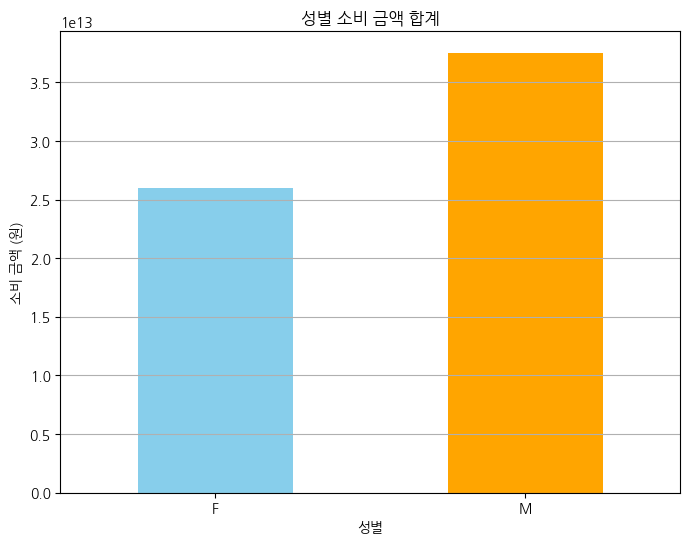

In [40]:
#여기에 코드를 입력해주세요.
# 성별별 소비 금액 합계
gender_consumption = data.groupby('성별코드')['사용금액'].sum()

# 시각화
plt.figure(figsize=(8, 6))
gender_consumption.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('성별 소비 금액 합계')
plt.xlabel('성별')
plt.ylabel('소비 금액 (원)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

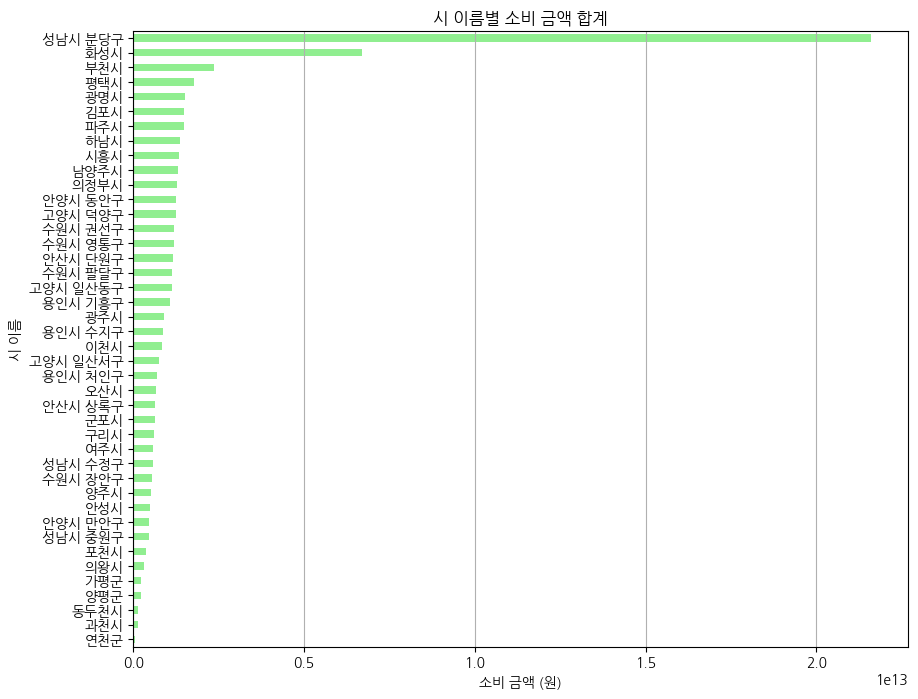

In [47]:

# 시이름별 소비 금액 합계
city_consumption = data.groupby('시군구명')['사용금액'].sum().sort_values()

# 시각화
plt.figure(figsize=(10, 8))
city_consumption.plot(kind='barh', color='lightgreen')
plt.title('시 이름별 소비 금액 합계')
plt.xlabel('소비 금액 (원)')
plt.ylabel('시 이름')
plt.grid(axis='x')
plt.show()

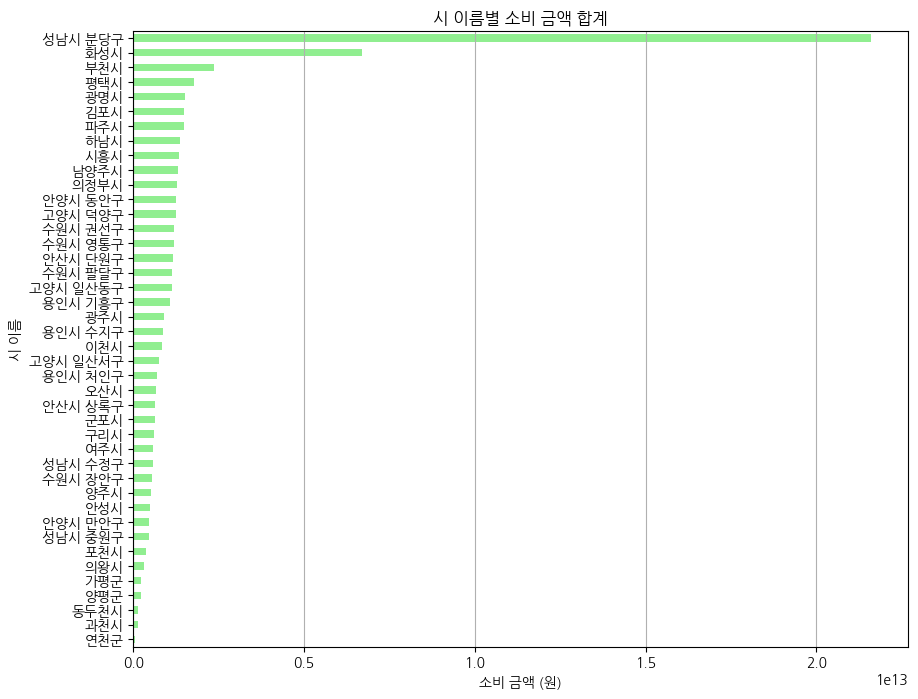

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시이름별 소비 금액 합계
city_consumption = data.groupby('시군구명')['사용금액'].sum().sort_values()

# 상위 3개 시이름 추출
top_3_cities = city_total.head(3).index

# 색상 설정 (상위 3개는 빨간색, 나머지는 기본 색상)
colors = ['red' if city in top_3_cities else 'lightblue' for city in city_total.index]

# 시각화
plt.figure(figsize=(10, 8))
city_consumption.plot(kind='barh', color='lightgreen')
plt.title('시 이름별 소비 금액 합계')
plt.xlabel('소비 금액 (원)')
plt.ylabel('시 이름')
plt.grid(axis='x')
plt.show()

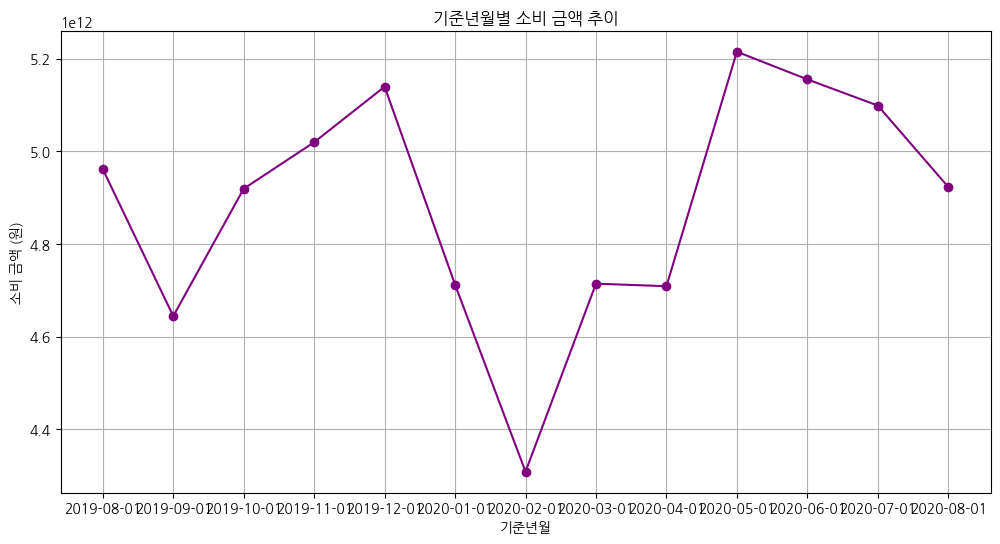

In [42]:
# 기준년월별 소비 금액 합계
monthly_consumption = data.groupby('기준년월')['사용금액'].sum()

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(monthly_consumption.index, monthly_consumption.values, marker='o', linestyle='-', color='purple')
plt.title('기준년월별 소비 금액 추이')
plt.xlabel('기준년월')
plt.ylabel('소비 금액 (원)')
plt.grid()
plt.show()

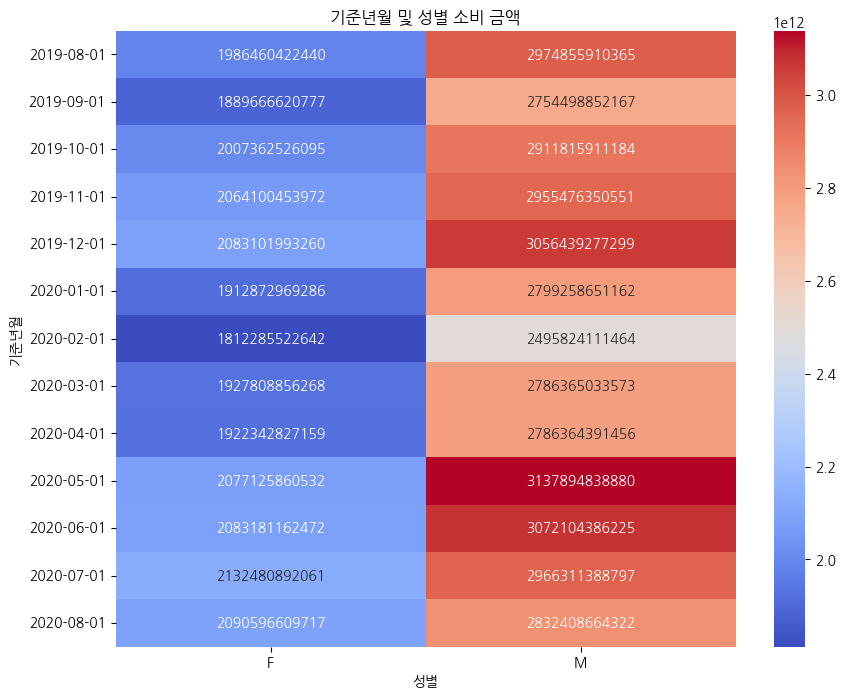

In [43]:
import seaborn as sns

# 기준년월 및 성별별 소비 금액 합계
pivot_data = data.pivot_table(values='사용금액', index='기준년월', columns='성별코드', aggfunc='sum')

# 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_data, annot=True, fmt=".0f", cmap='coolwarm', cbar=True)
plt.title('기준년월 및 성별 소비 금액')
plt.xlabel('성별')
plt.ylabel('기준년월')
plt.show()

<Figure size 1400x800 with 0 Axes>

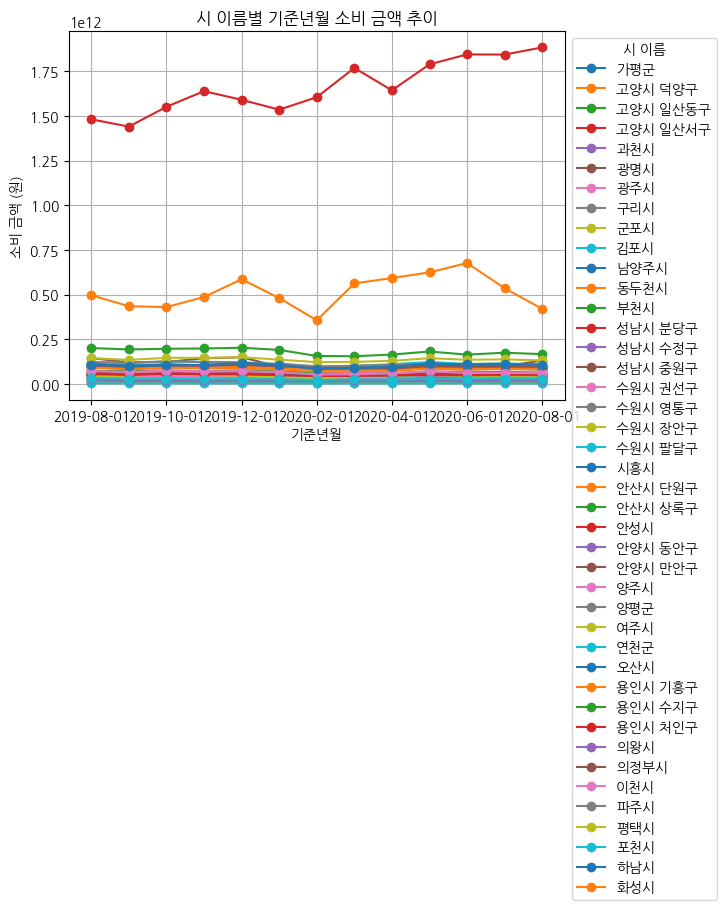

In [46]:
# 시이름별 소비 금액 추이
city_monthly_consumption = data.groupby(['기준년월', '시군구명'])['사용금액'].sum().unstack()

# 시각화
plt.figure(figsize=(14, 8))
city_monthly_consumption.plot(marker='o')
plt.title('시 이름별 기준년월 소비 금액 추이')
plt.xlabel('기준년월')
plt.ylabel('소비 금액 (원)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="시 이름")
plt.grid()
plt.show()

In [45]:
print(data.columns)

Index(['기준년월', '시도명', '시군구명', '성별코드', '사용금액', '사용금액_억'], dtype='object')


<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EB%AC%B8%EC%A0%9C.png" width = "220">

❤️ **3-2**
* 첫번째 그래프는 잘 나왔는데, 두번째 그래프는 잘 나오지 않고 아래 오류 메세지 같아 보이는 Warning(경고) 메세지가 떴네요?
* 이럴 때는 ChatGPT에게 내용을 그대로 복사하여 물어보면 됩니다!

<img src = "https://datadiving.net/wp-content/uploads/2024/03/chatGPT.png" width = "223">

🤖 **ChatGPT 프롬프트**


```
<ipython-input-24-d65269133855>:15: FutureWarning:

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged_df, x='시이름', y='소비건수', estimator=sum, ci=None)
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-24-d65269133855> in <cell line: 15>()
     13 # 시이름별 소비건수에 대한 시각화 (바 플롯)
     14 plt.figure(figsize=(12, 6))
---> 15 sns.barplot(data=merged_df, x='시이름', y='소비건수', estimator=sum, ci=None)
     16 plt.title('시이름별 소비건수')
     17 plt.xlabel('시이름')

5 frames
/usr/local/lib/python3.10/dist-packages/seaborn/_core/data.py in _assign_variables(self, data, variables)
    230                 else:
    231                     err += "An entry with this name does not appear in `data`."
--> 232                 raise ValueError(err)
    233
    234             else:

ValueError: Could not interpret value `소비건수` for `y`. An entry with this name does not appear in `data`.
<Figure size 1200x600 with 0 Axes>
```

이런 오류가 발생했어

In [ ]:
#여기에 코드를 입력해주세요.

<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EB%AC%B8%EC%A0%9C.png" width = "220">

❤️ **3-3**
* 두번째 그래프의 오류가 고쳐져서 잘 보이네요!
* 그렇다면 이번에는 잘 나왔던 첫번째 플롯(그래프)로 다시 올라가서, '성별', '기준년월별 소비금액'별 소비금액을 하나의 플롯(그래프)로 시각화 하는 것이 아닌 두개를 따로 각각 시각화 하고 싶은 상황입니다.
* 바로 각각 시각화를 해달라고 할 수도 있겠지만, 시각화 방식을 추천받은 뒤 내가 원하는 방법을 골라서 시각화를 진행해볼 수도 있습니다.
* 두개를 각각 다시 시각화를 한다고 할때 어떤 방식으로 시각화 하는 것이 좋을지 추천해달라고 해볼까요?

<img src = "https://datadiving.net/wp-content/uploads/2024/03/chatGPT.png" width = "223">

🤖 **ChatGPT 프롬프트**

위에서는 성별, 기준년월별 소비금액을 함께 시각화 하는 방식을 알려줬는데 두개를 따로 시각화한다고 할때 좋은 시각화 방식들을 이유와 함께 추천해줘.

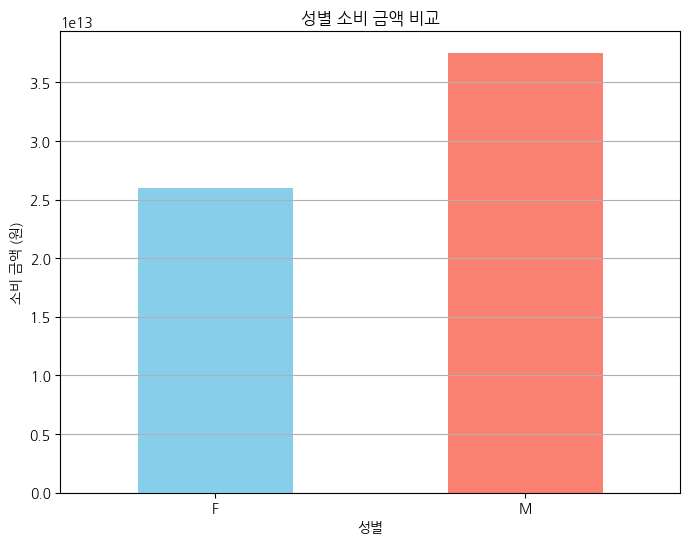

In [48]:
# 챗GPT가 추천해준 방법

#여기에 코드를 입력해주세요.
gender_consumption = data.groupby('성별코드')['사용금액'].sum()
gender_consumption.plot(kind='bar', color=['skyblue', 'salmon'], figsize=(8, 6))
plt.title('성별 소비 금액 비교')
plt.xlabel('성별')
plt.ylabel('소비 금액 (원)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

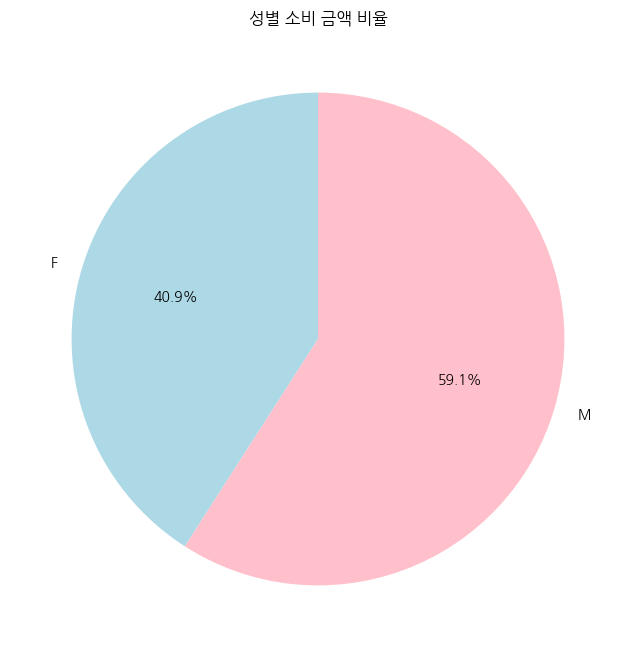

In [49]:
gender_consumption.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90, colors=['lightblue', 'pink'])
plt.title('성별 소비 금액 비율')
plt.ylabel('')  # y축 레이블 제거
plt.show()

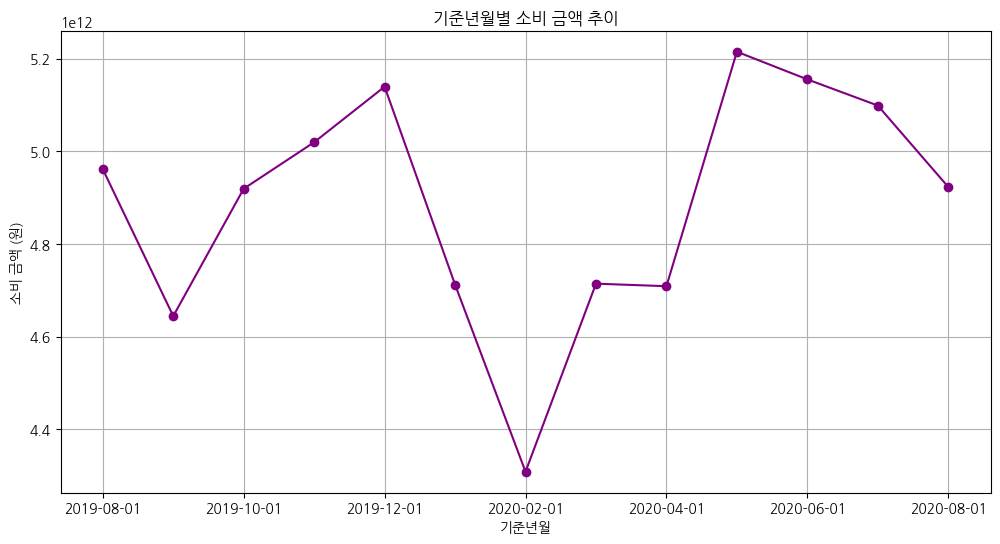

In [50]:
monthly_consumption = data.groupby('기준년월')['사용금액'].sum()
monthly_consumption.plot(kind='line', marker='o', figsize=(12, 6), color='purple')
plt.title('기준년월별 소비 금액 추이')
plt.xlabel('기준년월')
plt.ylabel('소비 금액 (원)')
plt.grid()
plt.show()

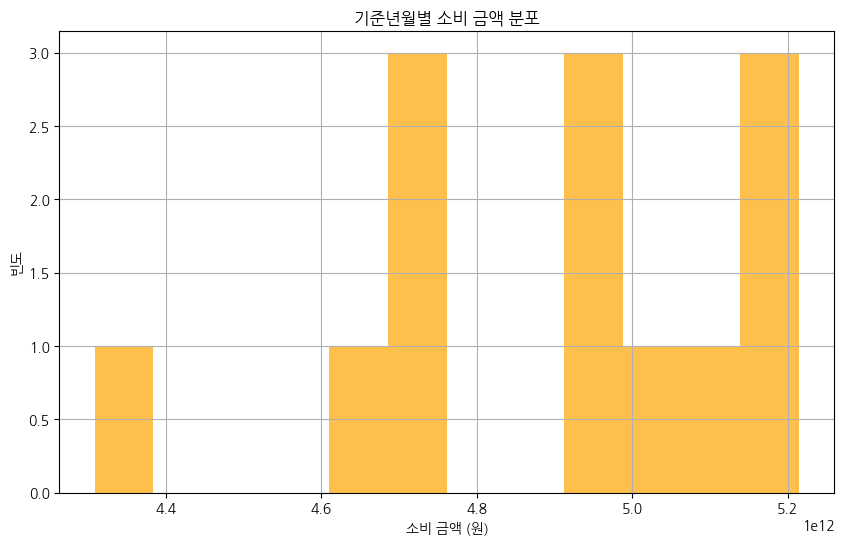

In [51]:
data.groupby('기준년월')['사용금액'].sum().plot(kind='hist', bins=12, figsize=(10, 6), color='orange', alpha=0.7)
plt.title('기준년월별 소비 금액 분포')
plt.xlabel('소비 금액 (원)')
plt.ylabel('빈도')
plt.grid()
plt.show()

In [52]:
pivot_data = data.pivot_table(values='사용금액', index=data['기준년월'].dt.year, columns=data['기준년월'].dt.month, aggfunc='sum')
sns.heatmap(pivot_data, annot=True, fmt=".0f", cmap='Blues', cbar=True)
plt.title('연도 및 월별 소비 금액')
plt.xlabel('월')
plt.ylabel('연도')
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EB%AC%B8%EC%A0%9C.png" width = "220">

❤️ **3-4**
* 챗GPT가 적절한 플롯을 잘 추천해주었네요.
* 저는 우선 성별에 따른 소비금액 비교를 위해 추천해준 내용 중 박스플롯을 활용하여 시각화를 해보고 싶습니다.

🤖 **ChatGPT 프롬프트**

성별에 따른 소비금액 비교를 위한 박스 플롯을 그릴 수 있는 코드를 알려줘.

<ipython-input-53-a78e107ca327>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='성별코드', y='사용금액', palette='pastel')


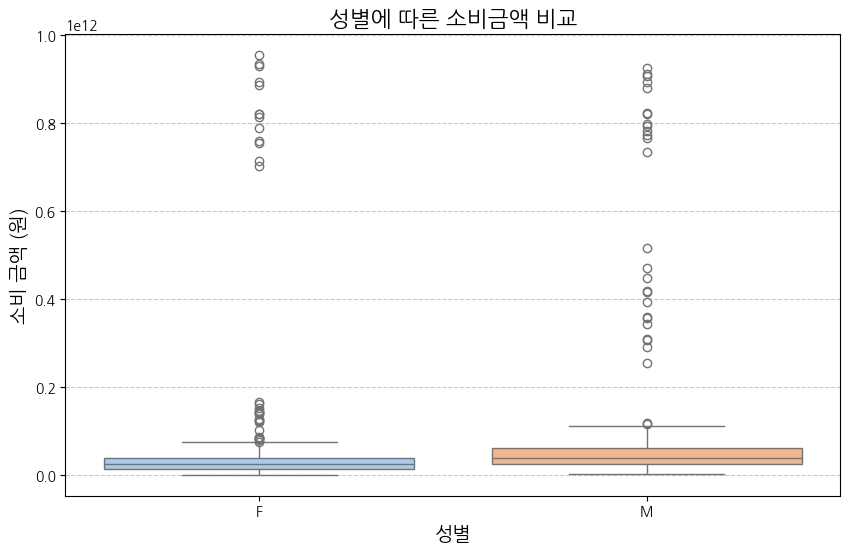

In [53]:
#여기에 코드를 입력해주세요.
import matplotlib.pyplot as plt
import seaborn as sns

# 박스 플롯 생성
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='성별코드', y='사용금액', palette='pastel')

# 그래프 설정
plt.title('성별에 따른 소비금액 비교', fontsize=16)
plt.xlabel('성별', fontsize=14)
plt.ylabel('소비 금액 (원)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [56]:
# 사용금액의 기본 통계 확인
print(data['사용금액'].describe())

count    1.092000e+03
mean     5.816759e+10
std      1.293330e+11
min      1.391164e+09
25%      1.791019e+10
50%      3.164451e+10
75%      4.990318e+10
max      9.561645e+11
Name: 사용금액, dtype: float64


<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EB%AC%B8%EC%A0%9C.png" width = "220">

❤️ **3-5**
* 잘 그려진 것 같은데, 여기서 꼭 확인을 하고 넘어가야 하는 것이 있습니다!
> `바로 챗GPT가 알려줄 때 '성별코드' 열의 값이 다르다면 적절하게 수정하여 사용하시면 됩니다~ 라는 부분`
* 우리가 F가 여성이고 M이 남성이라는 것을 알려주지 않았기 때문에 챗GPT가 임의로 설정하여 코드를 짜준 것이기 때문에 이런 부분은 처음부터 알려주고 코드 작성을 부탁하거나, 더블체킹이 필요합니다!
* 누락된 부분을 알려주며 다시 확인해달라고 해볼까요?


<img src = "https://datadiving.net/wp-content/uploads/2024/03/chatGPT.png" width = "223">

🤖 **ChatGPT 프롬프트**

F가 여성이고, M이 남성이야 제대로 작성된 코드가 맞는지 확인해줘.

In [ ]:
#여기에 코드를 입력해주세요.

<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EB%AC%B8%EC%A0%9C.png" width = "220">

❤️ **3-6**
* 역시 잘못된 부분이 있었네요, 그래도 잘 수정된 것 같습니다!
* 그렇다면 이번에는 플롯을 좀 더 매력적으로 만들어봅시다.
* 여성은 주황색으로 남성은 초록색으로 그래프 색상을 변경해볼까요?


<img src = "https://datadiving.net/wp-content/uploads/2024/03/chatGPT.png" width = "223">

🤖 **ChatGPT 프롬프트**

이번에는 여성의 박스플롯은 주황색으로, 남성의 박스플롯은 초록색으로 표시하고 싶어

<ipython-input-58-29a65a26a0af>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='성별코드', y='사용금액', palette=color_palette)


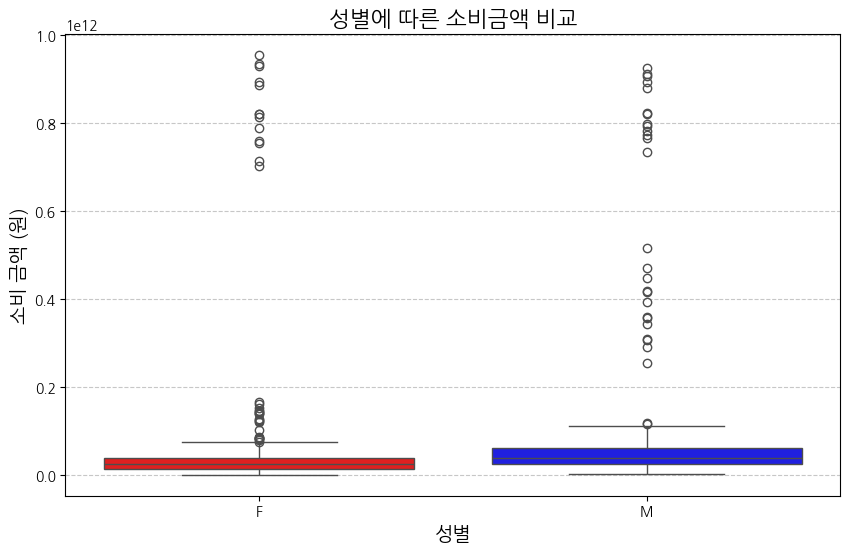

In [58]:
#여기에 코드를 입력해주세요.
import matplotlib.pyplot as plt
import seaborn as sns

# 색상 지정
color_palette = {'F': 'red', 'M': 'blue'}

# 박스 플롯 생성
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='성별코드', y='사용금액', palette=color_palette)

# 그래프 설정
plt.title('성별에 따른 소비금액 비교', fontsize=16)
plt.xlabel('성별', fontsize=14)
plt.ylabel('소비 금액 (원)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [59]:
# 성별별 소비 금액 통계 계산
statistics = data.groupby('성별코드')['사용금액'].describe()

# 결과 출력
print("성별별 소비 금액 통계:")
print(statistics)

성별별 소비 금액 통계:
      count          mean           std           min           25%  \
성별코드                                                                  
F     546.0  4.759961e+10  1.250964e+11  1.391164e+09  1.454783e+10   
M     546.0  6.873556e+10  1.327096e+11  2.540044e+09  2.510652e+10   

               50%           75%           max  
성별코드                                            
F     2.493601e+10  3.887473e+10  9.561645e+11  
M     4.039576e+10  6.101804e+10  9.265645e+11  


<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EB%AC%B8%EC%A0%9C.png" width = "220">

❤️ **3-7**
* 잘 된 것 같아 보이긴 하는데,,, 위에 또 Future Warning(경고문)이 생겼네요!
* 이럴 때는 바로 챗GPT에게 물어볼까요?


<img src = "https://datadiving.net/wp-content/uploads/2024/03/chatGPT.png" width = "223">

🤖 **ChatGPT 프롬프트**

그래프가 잘 뜨긴 했는데 아래와 같은 메세지가 함께 떴어.

<ipython-input-45-293d357b3563>:6: FutureWarning:

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='성별코드', y='사용금액', palette={'F': 'orange', 'M': 'green'})

In [ ]:
#여기에 코드를 입력해주세요.

<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EB%AC%B8%EC%A0%9C.png" width = "220">

❤️ **3-8**
* 네 이번에 잘 나왔네요~!
* 그렇다면 이번에는 다시 위로 올라가서 성별이 아닌, 기준년월별 소비금액 추이 플롯(그래프)을 그려보려고 합니다.
* 이번에도 역시 챗GPT가 추천해준 것 중에 선그래프로 나타내보려고 합니다.

<img src = "https://datadiving.net/wp-content/uploads/2024/03/chatGPT.png" width = "223">

🤖 **ChatGPT 프롬프트**

다시 위로 올라가서 기준년월별 소비금액 추이를 선그래프로 시각화 하고 싶어. 코드를 알려줘

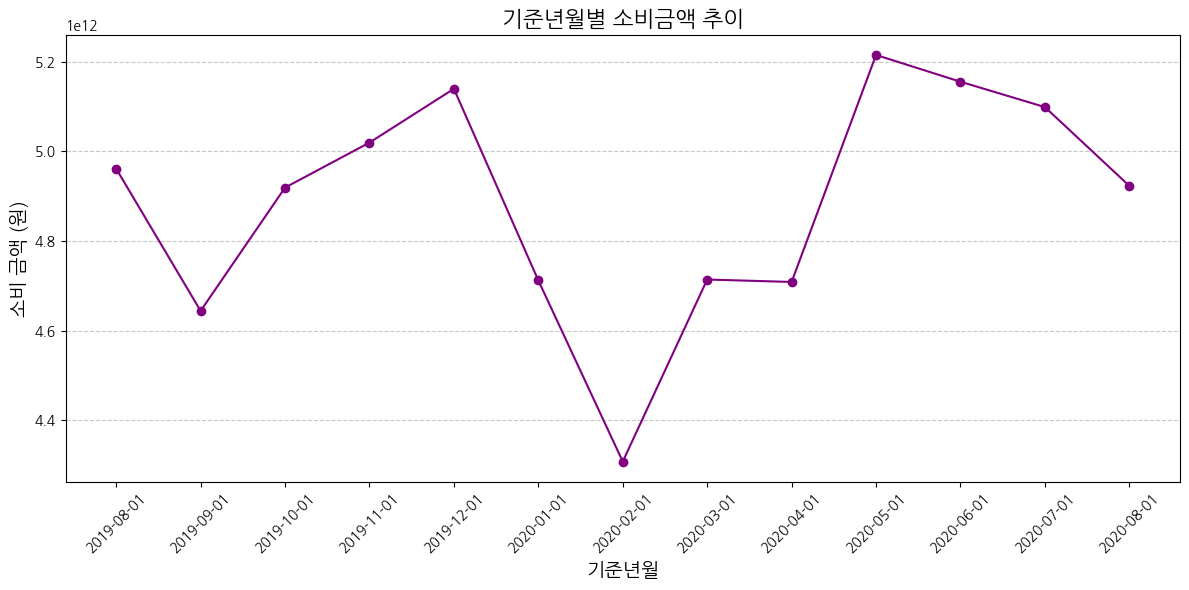

In [60]:
#여기에 코드를 입력해주세요.
import matplotlib.pyplot as plt

# 기준년월별 소비금액 합계 계산
monthly_consumption = data.groupby('기준년월')['사용금액'].sum()

# 선그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(monthly_consumption.index, monthly_consumption.values, marker='o', linestyle='-', color='purple')

# 그래프 설정
plt.title('기준년월별 소비금액 추이', fontsize=16)
plt.xlabel('기준년월', fontsize=14)
plt.ylabel('소비 금액 (원)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

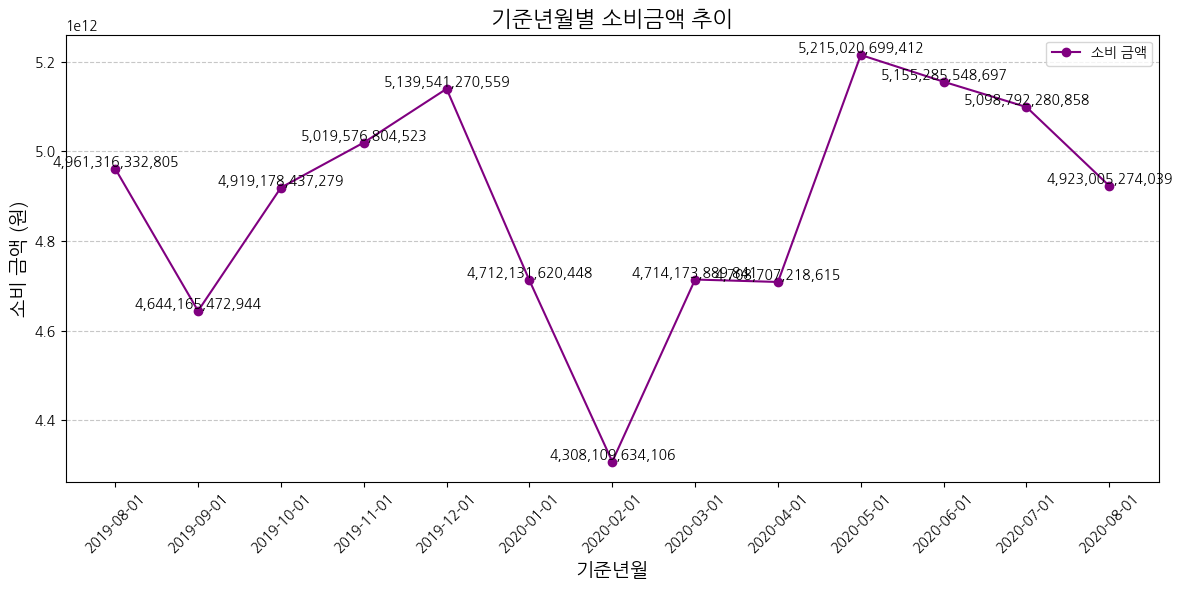

In [61]:
import matplotlib.pyplot as plt

# 기준년월별 소비금액 합계 계산
monthly_consumption = data.groupby('기준년월')['사용금액'].sum()

# 선그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(monthly_consumption.index, monthly_consumption.values, marker='o', linestyle='-', color='purple', label='소비 금액')

# 데이터 포인트에 숫자 추가
for x, y in zip(monthly_consumption.index, monthly_consumption.values):
    plt.text(x, y, f'{y:,.0f}', fontsize=10, ha='center', va='bottom', color='black')

# 그래프 설정
plt.title('기준년월별 소비금액 추이', fontsize=16)
plt.xlabel('기준년월', fontsize=14)
plt.ylabel('소비 금액 (원)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

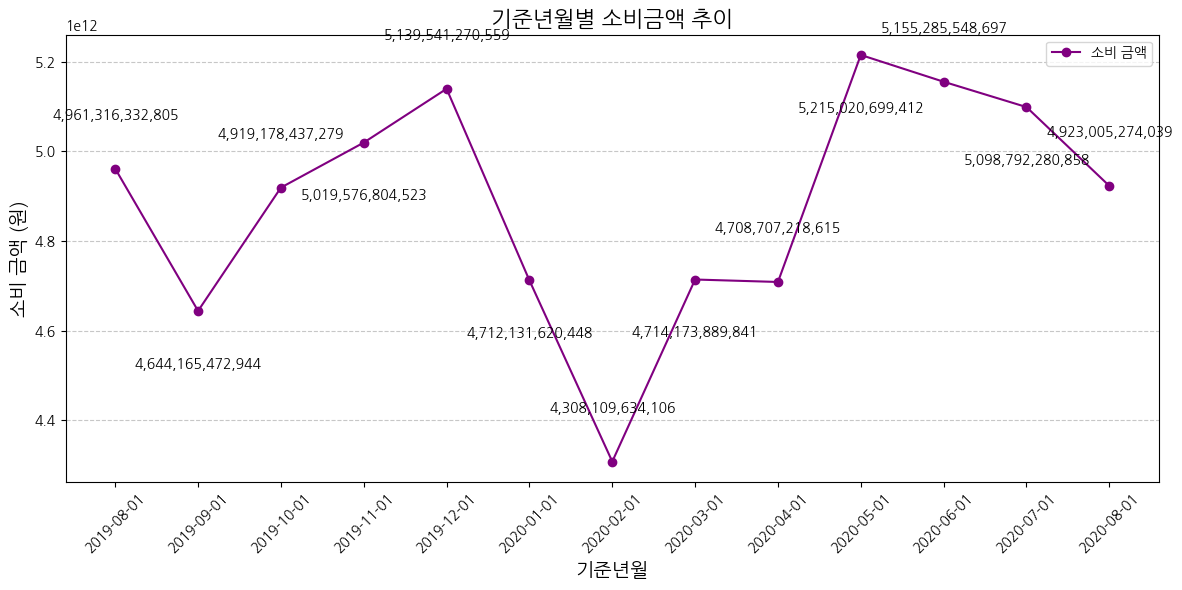

In [62]:
import matplotlib.pyplot as plt

# 기준년월별 소비금액 합계 계산
monthly_consumption = data.groupby('기준년월')['사용금액'].sum()

# 선그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(monthly_consumption.index, monthly_consumption.values, marker='o', linestyle='-', color='purple', label='소비 금액')

# 데이터 포인트에 숫자 추가 (위아래 간격 조정)
for i, (x, y) in enumerate(zip(monthly_consumption.index, monthly_consumption.values)):
    # 짝수 번째는 위에, 홀수 번째는 아래에 숫자를 표시
    offset = 0.02 * max(monthly_consumption.values)  # 간격 계산
    vertical_position = y + offset if i % 2 == 0 else y - offset
    alignment = 'bottom' if i % 2 == 0 else 'top'
    plt.text(x, vertical_position, f'{y:,.0f}', fontsize=10, ha='center', va=alignment, color='black')

# 그래프 설정
plt.title('기준년월별 소비금액 추이', fontsize=16)
plt.xlabel('기준년월', fontsize=14)
plt.ylabel('소비 금액 (원)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

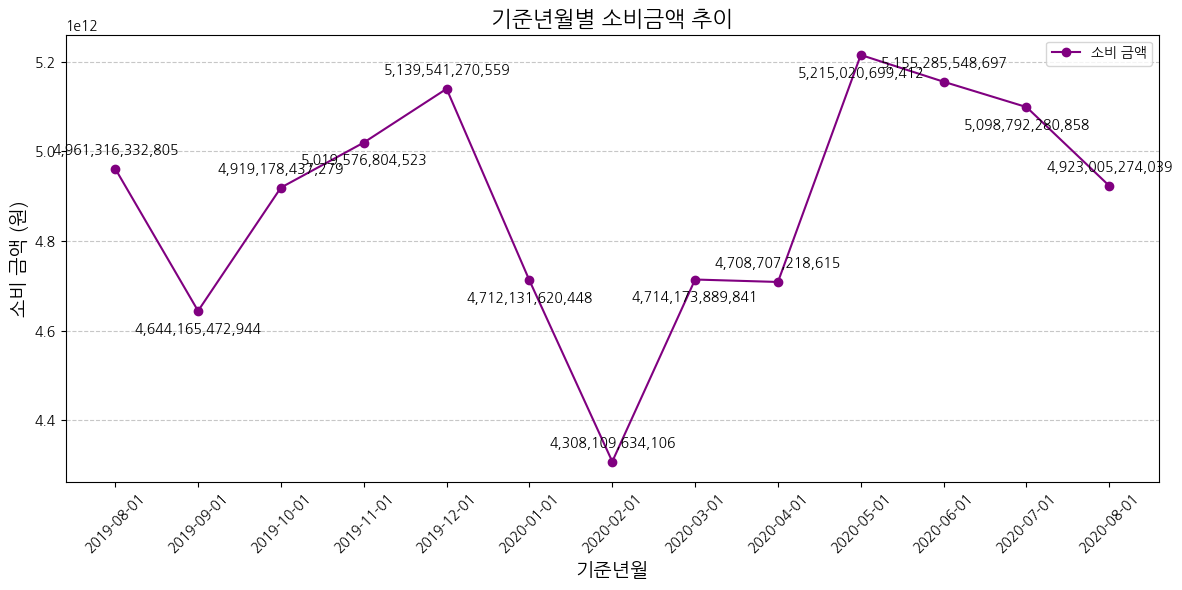

In [63]:
import matplotlib.pyplot as plt

# 기준년월별 소비금액 합계 계산
monthly_consumption = data.groupby('기준년월')['사용금액'].sum()

# 선그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(monthly_consumption.index, monthly_consumption.values, marker='o', linestyle='-', color='purple', label='소비 금액')

# 데이터 포인트에 숫자 추가 (간격 조정)
for i, (x, y) in enumerate(zip(monthly_consumption.index, monthly_consumption.values)):
    # 짝수 번째는 위에, 홀수 번째는 아래에 숫자를 표시
    offset = 0.005 * max(monthly_consumption.values)  # 간격 줄임
    vertical_position = y + offset if i % 2 == 0 else y - offset
    alignment = 'bottom' if i % 2 == 0 else 'top'
    plt.text(x, vertical_position, f'{y:,.0f}', fontsize=10, ha='center', va=alignment, color='black')

# 그래프 설정
plt.title('기준년월별 소비금액 추이', fontsize=16)
plt.xlabel('기준년월', fontsize=14)
plt.ylabel('소비 금액 (원)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EB%AC%B8%EC%A0%9C.png" width = "220">

❤️ **3-9**
* 선 그래프도 잘 나왔는데요, 여기서 그래프를 조금 변경해보고 싶습니다.
* 남성과 여성의 기준년월별 소비금액 추이를 추가해보고 싶다면 어떻게 해야할까요?

<img src = "https://datadiving.net/wp-content/uploads/2024/03/chatGPT.png" width = "223">

🤖 **ChatGPT 프롬프트**

남성과 여성의 기준년월별 소비금액 추이를 추가할 수 있을까?

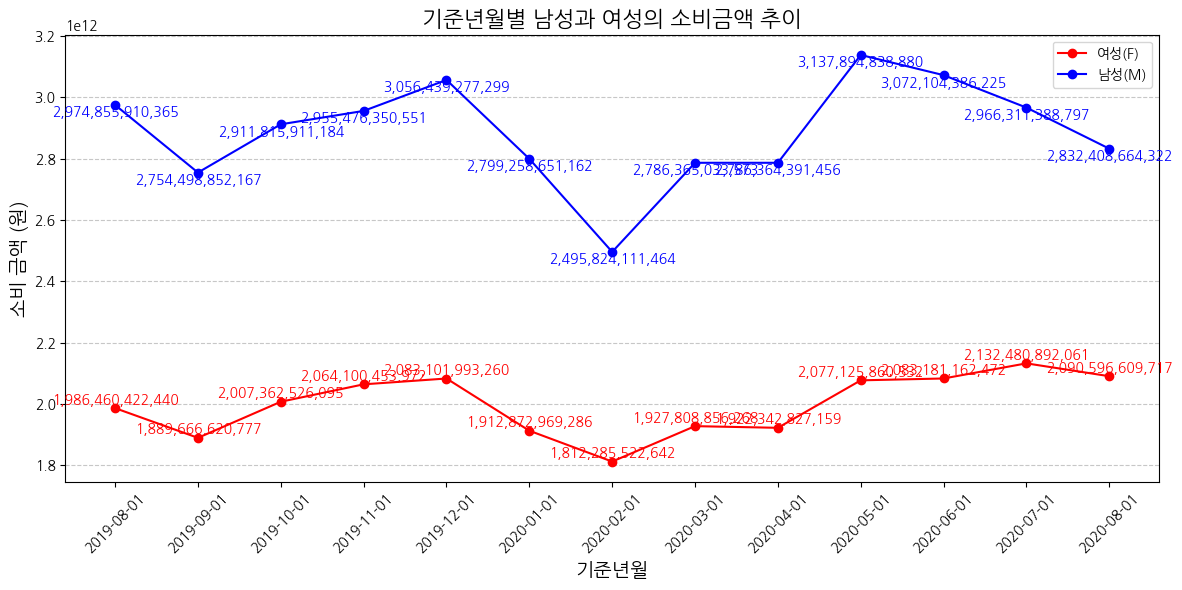

In [64]:
#여기에 코드를 입력해주세요.
import matplotlib.pyplot as plt

# 기준년월 및 성별별 소비금액 합계 계산
gender_monthly_consumption = data.groupby(['기준년월', '성별코드'])['사용금액'].sum().unstack()

# 선그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(gender_monthly_consumption.index, gender_monthly_consumption['F'], marker='o', linestyle='-', color='red', label='여성(F)')
plt.plot(gender_monthly_consumption.index, gender_monthly_consumption['M'], marker='o', linestyle='-', color='blue', label='남성(M)')

# 데이터 포인트에 숫자 추가 (간격 조정)
offset = 0.005 * max(data['사용금액'])  # 간격 설정
for i, (x, y_f, y_m) in enumerate(zip(gender_monthly_consumption.index, gender_monthly_consumption['F'], gender_monthly_consumption['M'])):
    # 여성 데이터 포인트에 숫자 추가
    plt.text(x, y_f + offset, f'{y_f:,.0f}', fontsize=10, ha='center', va='bottom', color='red')
    # 남성 데이터 포인트에 숫자 추가
    plt.text(x, y_m - offset, f'{y_m:,.0f}', fontsize=10, ha='center', va='top', color='blue')

# 그래프 설정
plt.title('기준년월별 남성과 여성의 소비금액 추이', fontsize=16)
plt.xlabel('기준년월', fontsize=14)
plt.ylabel('소비 금액 (원)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EB%AC%B8%EC%A0%9C.png" width = "220">

❤️ **3-10**
* 그래프를 더 잘 파악하기 위해 요소를 더 추가해보고 싶습니다.
* 각각의 여성, 남성 그래프에 각 성별의 기준년월별 소비금액 추이 평균선을 추가하고 싶다면 어떻게 해야할까요?

<img src = "https://datadiving.net/wp-content/uploads/2024/03/chatGPT.png" width = "223">

🤖 **ChatGPT 프롬프트**

이 그래프에 각각 남성의 기준년월별 소비금액 추이 평균선과, 여성의 기준년월별 소비금액 추이 평균선을 추가하고 싶어.

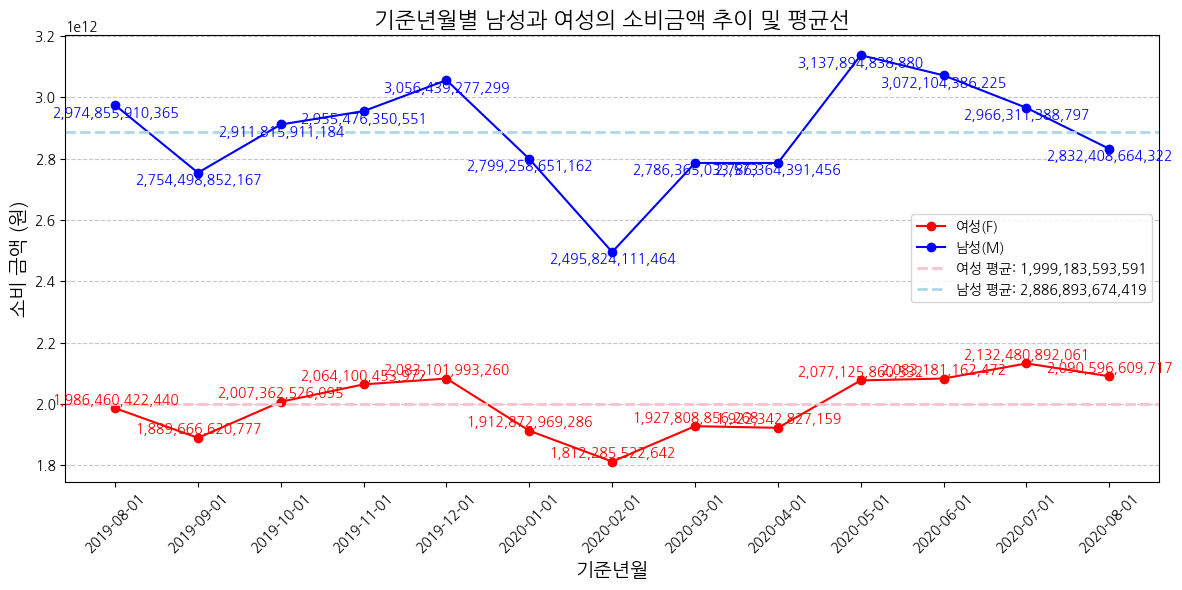

In [65]:
#여기에 코드를 입력해주세요.
import matplotlib.pyplot as plt

# 기준년월 및 성별별 소비금액 합계 계산
gender_monthly_consumption = data.groupby(['기준년월', '성별코드'])['사용금액'].sum().unstack()

# 성별 소비금액 평균 계산
average_female = gender_monthly_consumption['F'].mean()
average_male = gender_monthly_consumption['M'].mean()

# 선그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(gender_monthly_consumption.index, gender_monthly_consumption['F'], marker='o', linestyle='-', color='red', label='여성(F)')
plt.plot(gender_monthly_consumption.index, gender_monthly_consumption['M'], marker='o', linestyle='-', color='blue', label='남성(M)')

# 평균선 추가
plt.axhline(average_female, color='pink', linestyle='--', linewidth=2, label=f'여성 평균: {average_female:,.0f}')
plt.axhline(average_male, color='lightblue', linestyle='--', linewidth=2, label=f'남성 평균: {average_male:,.0f}')

# 데이터 포인트에 숫자 추가 (간격 조정)
offset = 0.005 * max(data['사용금액'])  # 간격 설정
for i, (x, y_f, y_m) in enumerate(zip(gender_monthly_consumption.index, gender_monthly_consumption['F'], gender_monthly_consumption['M'])):
    # 여성 데이터 포인트에 숫자 추가
    plt.text(x, y_f + offset, f'{y_f:,.0f}', fontsize=10, ha='center', va='bottom', color='red')
    # 남성 데이터 포인트에 숫자 추가
    plt.text(x, y_m - offset, f'{y_m:,.0f}', fontsize=10, ha='center', va='top', color='blue')

# 그래프 설정
plt.title('기준년월별 남성과 여성의 소비금액 추이 및 평균선', fontsize=16)
plt.xlabel('기준년월', fontsize=14)
plt.ylabel('소비 금액 (원)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EB%AC%B8%EC%A0%9C.png" width = "220">

❤️ **3-11**
* 다시 위에서 만들었던 '시이름별 소비건수에 대한 시각화 플롯'으로 돌아가서 이 플롯도 더 매력적으로 만드는 작업을 하고 싶습니다.
* 이 플롯에서 상위 3개의 바 그래프만 색상을 변경하고 싶다면 어떻게 할까요?
* (참고!) 바로 이전 내용이 아닌, 대화 텀이 지난 후 내용을 지칭할 때는 그 대화에서 사용했던 키워드를 정확히 언급해주고, 코드를 한번 더 상기시켜 주면 더 정확도 높은 대화가 가능합니다.

<img src = "https://datadiving.net/wp-content/uploads/2024/03/chatGPT.png" width = "223">

🤖 **ChatGPT 프롬프트**

아까 위에서 만들어줬던 '시이름별 소비건수에 대한 시각화 플롯'으로 돌아가서,
이 플롯에서 사용금액이 상위 3위에 해당하는 시이름의 바 그래프만 색상을 빨간색으로 표시하고 싶어.

참고로 잊어버렸을까봐 아래 이전에 시이름별 소비건수에 대한 시각화 플롯을 그렸던 코드를 함께 알려줄게.


```
# 시이름별 사용금액에 대한 시각화 (바 플롯)
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_df, x='시이름', y='사용금액', estimator=sum)
plt.title('시이름별 사용금액')
plt.xlabel('시이름')
plt.ylabel('사용금액')
plt.xticks(rotation=45)  # x축 눈금 라벨 회전
plt.show()
```



<ipython-input-67-7b7764f6a516>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_total.index, y=city_total.values, palette=colors)


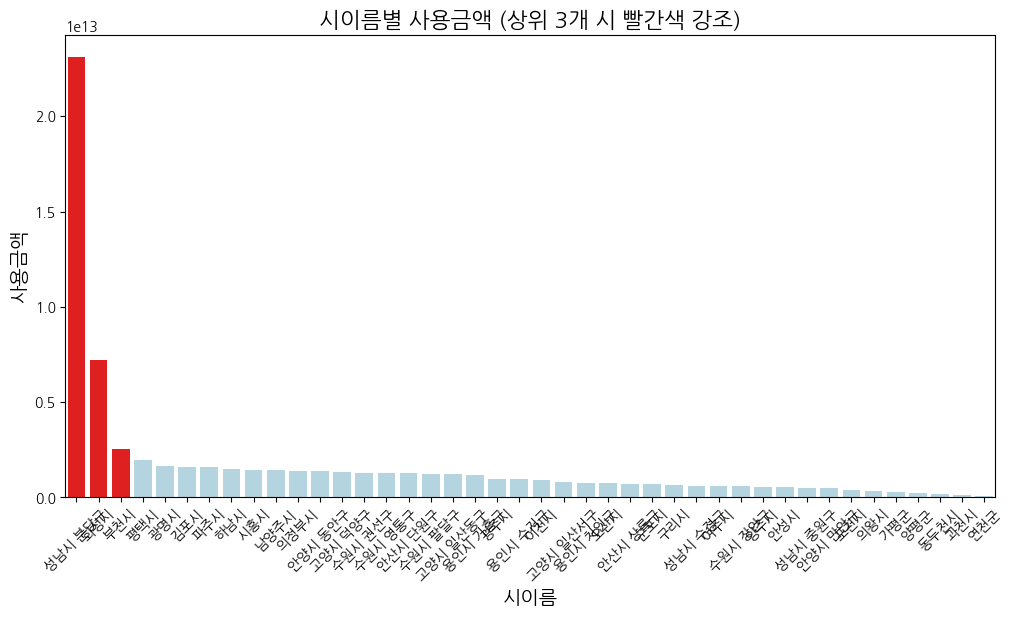

In [67]:
#여기에 코드를 입력해주세요.
import matplotlib.pyplot as plt
import seaborn as sns

# 시이름별 사용금액 합계 계산
city_total = merged_df.groupby('시군구명')['사용금액'].sum().sort_values(ascending=False)

# 상위 3개 시이름 추출
top_3_cities = city_total.head(3).index

# 색상 설정 (상위 3개는 빨간색, 나머지는 기본 색상)
colors = ['red' if city in top_3_cities else 'lightblue' for city in city_total.index]

# 바 플롯 생성
plt.figure(figsize=(12, 6))
sns.barplot(x=city_total.index, y=city_total.values, palette=colors)

# 그래프 설정
plt.title('시이름별 사용금액 (상위 3개 시 빨간색 강조)', fontsize=16)
plt.xlabel('시이름', fontsize=14)
plt.ylabel('사용금액', fontsize=14)
plt.xticks(rotation=45)  # x축 눈금 라벨 회전
plt.show()

<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EB%AC%B8%EC%A0%9C.png" width = "220">

❤️ **3-12**
* 그래프의 내용도 잘못 되었고, 오류 메세지도 뜨는 것 같습니다.
* 이에 대하여 챗GPT에게 물어볼까요?

<img src = "https://datadiving.net/wp-content/uploads/2024/03/chatGPT.png" width = "223">

🤖 **ChatGPT 프롬프트**

우선 상위 3위보다 훨씬 여러개가 하늘색으로 표시되었고,
아래와 같은 오류 메세지도 떴어.

<ipython-input-33-244249f11513>:12: FutureWarning:

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_df, x='시이름', y='사용금액', estimator=sum, palette=['skyblue' if city in top3_cities else 'lightgrey' for city in merged_df['시이름']])
<ipython-input-33-244249f11513>:12: UserWarning: The palette list has more values (1053) than needed (31), which may not be intended.
  sns.barplot(data=merged_df, x='시이름', y='사용금액', estimator=sum, palette=['skyblue' if city in top3_cities else 'lightgrey' for city in merged_df['시이름']])


In [ ]:
#여기에 코드를 입력해주세요.

<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EB%AC%B8%EC%A0%9C.png" width = "220">

❤️ **3-13**
* 운이 좋게, 잘못된 부분들이 한번에 잘 고쳐졌네요!
* 그렇다면 이번에는 그래프를 좀 더 조정해보고 싶습니다.
* 우선 보기 편하게 사용금액이 많은 순으로 그래프를 재정렬하고,
* 그다음 사용 금액 상위 3위에 해당하는 시의 그래프 위에만 "상위 1위 : 2조원" 이런식의 라벨을 달아주고 싶습니다.
* 형식을 정해줄 때, '{ }'이 모양의 괄호 안에 들어갈 변수들을 적어주는 방식으로 형식을 표현할 수 있습니다.

<img src = "https://datadiving.net/wp-content/uploads/2024/03/chatGPT.png" width = "223">

🤖 **ChatGPT 프롬프트**

이 상태에서 사용금액이 많은 순으로 그래프를 재정렬한 뒤,

사용금액 상위 3위에 해당하는 시이름 바그래프 위에는 아래 형식에 따라 라벨을 달아주고 싶어.

상위{순위}위 : {사용금액}조원

<ipython-input-70-ef1f2fcf8881>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=city_total.index, y=city_total.values, palette=colors)


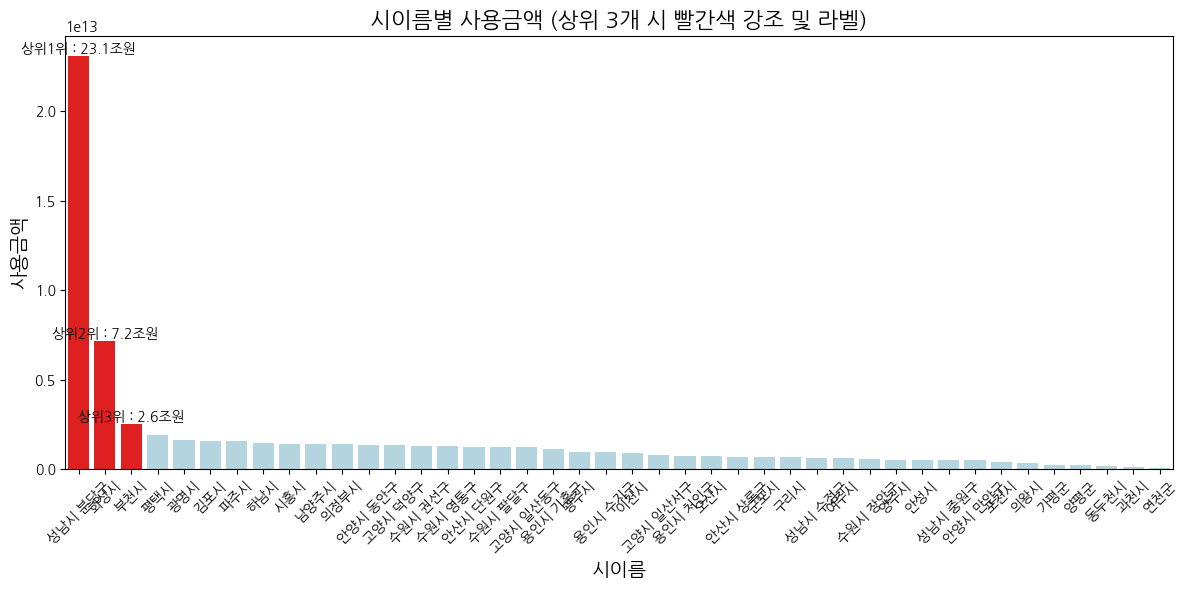

In [70]:
#여기에 코드를 입력해주세요.
import matplotlib.pyplot as plt
import seaborn as sns

# 시이름별 사용금액 합계 계산
city_total = merged_df.groupby('시군구명')['사용금액'].sum().sort_values(ascending=False)

# 상위 3개 시이름 추출
top_3_cities = city_total.head(3)

# 색상 설정 (상위 3개는 빨간색, 나머지는 기본 색상)
colors = ['red' if city in top_3_cities.index else 'lightblue' for city in city_total.index]

# 바 플롯 생성
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=city_total.index, y=city_total.values, palette=colors)

# 라벨 추가 (상위 3개)
for rank, (city, value) in enumerate(top_3_cities.items(), start=1):
    index = list(city_total.index).index(city)  # 바의 위치
    plt.text(index, value, f'상위{rank}위 : {value / 1e12:.1f}조원',
             ha='center', va='bottom', fontsize=10, color='black')

# 그래프 설정
plt.title('시이름별 사용금액 (상위 3개 시 빨간색 강조 및 라벨)', fontsize=16)
plt.xlabel('시이름', fontsize=14)
plt.ylabel('사용금액', fontsize=14)
plt.xticks(rotation=45)  # x축 눈금 라벨 회전
plt.tight_layout()
plt.show()

<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EB%AC%B8%EC%A0%9C.png" width = "220">

❤️ **3-14**
* 의도가 반만 반영된 것 같네요!
* 다시 원래 의도대로 기존 그래프에서 변경을 다시 요청하고 위에 뜬 경고 메세지에 대한 해결도 부탁해봅시다.
* (참고!) 이렇게 내 의도대로 되지 않을 때는 한번 더 말해주면 됩니다.

<img src = "https://datadiving.net/wp-content/uploads/2024/03/chatGPT.png" width = "223">

🤖 **ChatGPT 프롬프트**

좋은데 여기서 색상은 원래대로 상위 3위만 하늘색으로 표시하고, 나머지는 그레이로 표시했으면 좋겠어.

그리고 아래와 같은 메세지가 함께 떴어

```
<ipython-input-59-57be32d73d50>:10: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  merged_df_sorted['시이름'].cat.reorder_categories(city_spending.index, inplace=True)
<ipython-input-59-57be32d73d50>:18: FutureWarning:

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=merged_df_sorted, x='시이름', y='사용금액', estimator=sum, palette='viridis')'

```

<ipython-input-72-52c50f5b6bec>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=city_total.index, y=city_total.values, palette=colors)


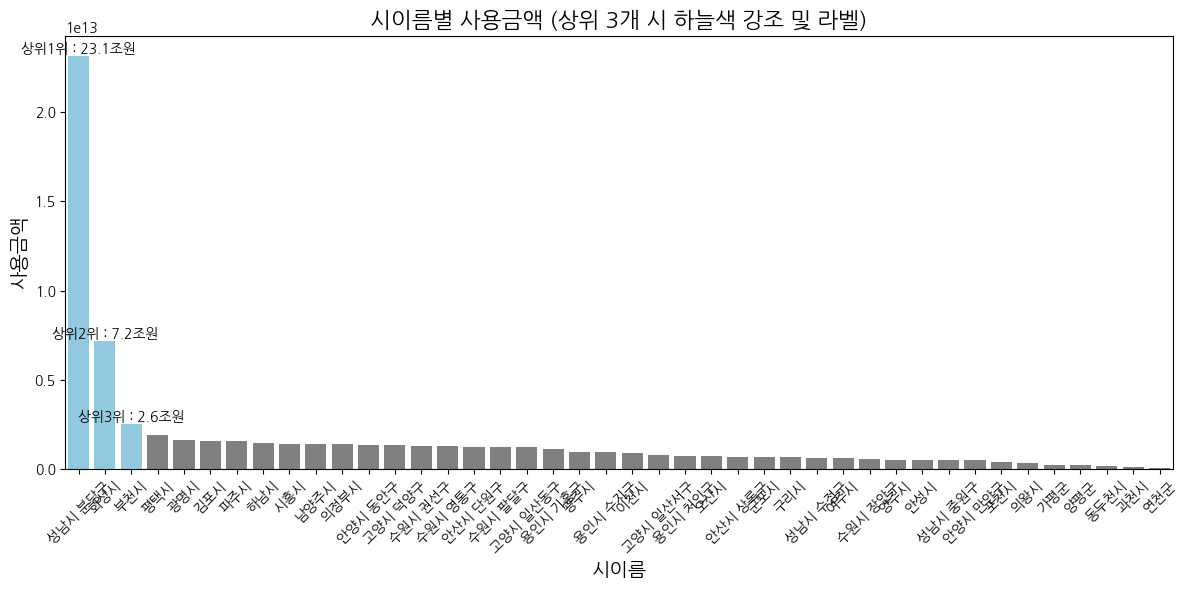

In [72]:
#여기에 코드를 입력해주세요.
import matplotlib.pyplot as plt
import seaborn as sns

# 시이름별 사용금액 합계 계산
city_total = merged_df.groupby('시군구명')['사용금액'].sum().sort_values(ascending=False)

# 상위 3개 시이름 추출
top_3_cities = city_total.head(3)

# 색상 설정 (상위 3개는 하늘색, 나머지는 회색)
colors = ['skyblue' if city in top_3_cities.index else 'gray' for city in city_total.index]

# 바 플롯 생성
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=city_total.index, y=city_total.values, palette=colors)

# 라벨 추가 (상위 3개)
for rank, (city, value) in enumerate(top_3_cities.items(), start=1):
    index = list(city_total.index).index(city)  # 바의 위치
    plt.text(index, value, f'상위{rank}위 : {value / 1e12:.1f}조원',
             ha='center', va='bottom', fontsize=10, color='black')

# 그래프 설정
plt.title('시이름별 사용금액 (상위 3개 시 하늘색 강조 및 라벨)', fontsize=16)
plt.xlabel('시이름', fontsize=14)
plt.ylabel('사용금액', fontsize=14)
plt.xticks(rotation=45)  # x축 눈금 라벨 회전
plt.tight_layout()
plt.show()

<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EB%AC%B8%EC%A0%9C.png" width = "220">

❤️ **3-15**
* 전부 하늘색으로 나왔네요~ 또 잘못된 부분이 있죠?
* 그래도 저희가 전부 다 외우고 매번 검색하고 이해해서 코드를 모두 작성하는 것보다는 훨씬 빠른 방법이니 인내심을 가지고 고쳐봅시다.
* 우리에게 중요한 것은 혼자 해볼 때 에러가 발생하면 혼자서 고칠 수 있는 힘입니다!
* 이번에도 잘못된 부분을 다시 수정해달라고 추가 요구를 해봅시다.

<img src = "https://datadiving.net/wp-content/uploads/2024/03/chatGPT.png" width = "223">

🤖 **ChatGPT 프롬프트**

이번에는 모든 그래프가 하늘색으로 표시되었어. 고쳐줘.
그리고 아래와 같은 메세지가 떴어.

```
<ipython-input-60-19e1ff6cdb3f>:17: FutureWarning:

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=merged_df_sorted, x='시이름', y='사용금액', estimator=sum, palette=['lightgrey' if city not in top3_cities else 'skyblue' for city in merged_df_sorted['시이름']], dodge=False)
<ipython-input-60-19e1ff6cdb3f>:17: UserWarning: The palette list has more values (1053) than needed (31), which may not be intended.
  barplot = sns.barplot(data=merged_df_sorted, x='시이름', y='사용금액', estimator=sum, palette=['lightgrey' if city not in top3_cities else 'skyblue' for city in merged_df_sorted['시이름']], dodge=False)

```

In [ ]:
#여기에 코드를 입력해주세요.

<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EB%AC%B8%EC%A0%9C.png" width = "220">

❤️ **3-16**
* 좀 더 고도화된 시각화를 해봅시다!
* 기준년월을 x축, 사용금액의 평균을 y축으로 하는 선 그래프를 그린 뒤, 원형 마커를 사용하여 각 월별 평균 사용금액을 표시하여 데이터 포인트를 눈에 띄게 만들어 봅시다.

<img src = "https://datadiving.net/wp-content/uploads/2024/03/chatGPT.png" width = "223">

🤖 **ChatGPT 프롬프트**

기준년월을 x축, 소비금액의 평균을 y축으로 하는 선 그래프를 그린 뒤, 원형 마커를 사용하여 각 월별 평균 사용금액을 표시하고 싶어. 이때 필요한 파이썬 코드를 알려줘.

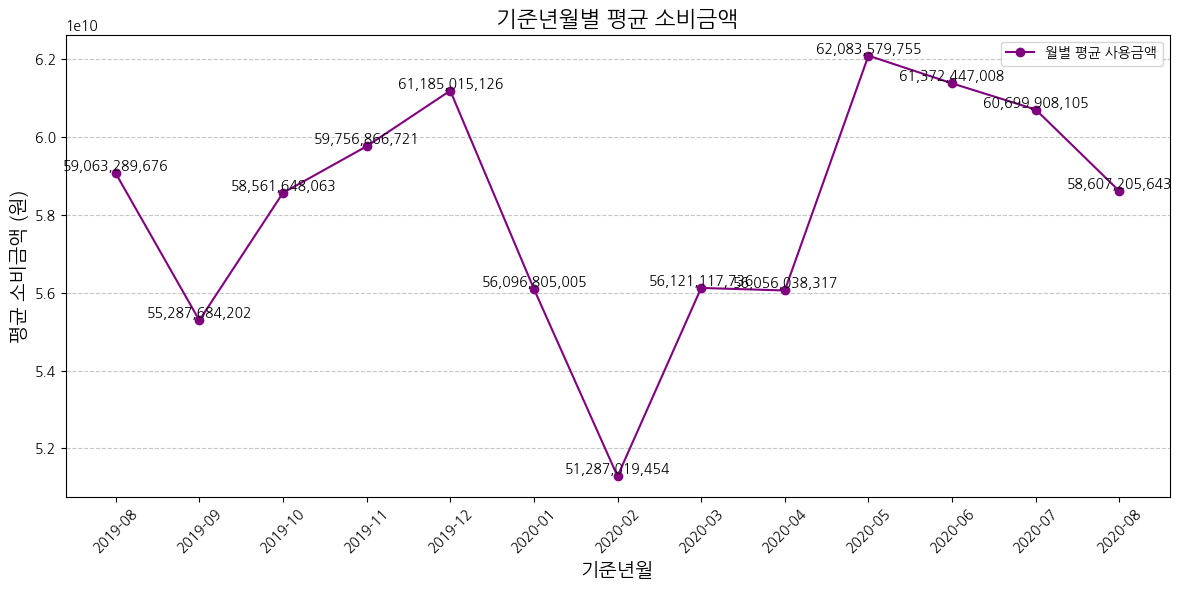

In [73]:
#여기에 코드를 입력해주세요.
import matplotlib.pyplot as plt

# 기준년월별 소비금액 평균 계산
monthly_avg = merged_df.groupby('기준년월')['사용금액'].mean()

# 선 그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-', color='purple', label='월별 평균 사용금액')

# 데이터 포인트에 평균 금액 표시
for x, y in zip(monthly_avg.index, monthly_avg.values):
    plt.text(x, y, f'{y:,.0f}', fontsize=10, ha='center', va='bottom', color='black')

# 그래프 설정
plt.title('기준년월별 평균 소비금액', fontsize=16)
plt.xlabel('기준년월', fontsize=14)
plt.ylabel('평균 소비금액 (원)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EB%AC%B8%EC%A0%9C.png" width = "220">

❤️ **3-17**
* 좀 더 고도화된 시각화를 해봅시다 2탄!
* 기준년월을 x축으로 하고, 남성과 여성의 사용금액 평균을 각각 선 그래프로 그린뒤, 이 두 선 사이의 영역을 색으로 채워서 시간에 따른 성별 사용금액 차이를 시각적으로 표현해봅시다.

<img src = "https://datadiving.net/wp-content/uploads/2024/03/chatGPT.png" width = "223">

🤖 **ChatGPT 프롬프트**

이번에는 기준년월을 x축으로 하고, 각 성별코드의 사용금액 평균을 각각 선 그래프로 그린뒤, 이 두 선 사이의 영역을 색으로 채워서 시간에 따른 성별코드별 사용금액 차이를 시각적으로 표현하고 싶어.


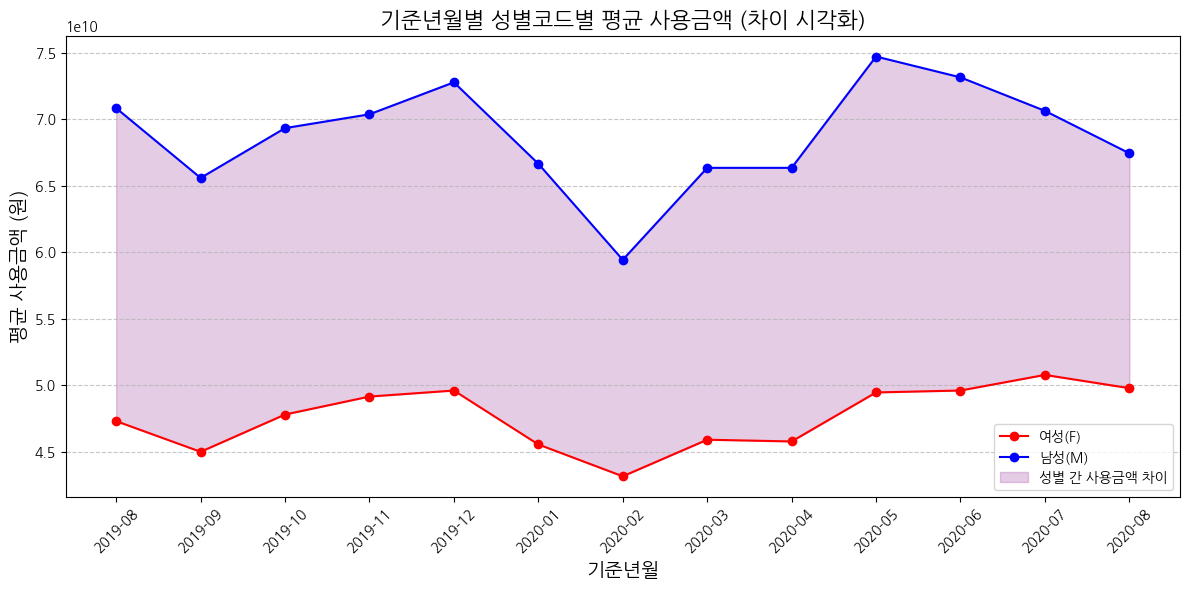

In [74]:
#여기에 코드를 입력해주세요.
import matplotlib.pyplot as plt

# 기준년월 및 성별코드별 사용금액 평균 계산
gender_monthly_avg = merged_df.groupby(['기준년월', '성별코드'])['사용금액'].mean().unstack()

# 선 그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(gender_monthly_avg.index, gender_monthly_avg['F'], marker='o', linestyle='-', color='red', label='여성(F)')
plt.plot(gender_monthly_avg.index, gender_monthly_avg['M'], marker='o', linestyle='-', color='blue', label='남성(M)')

# 두 선 사이의 영역 색칠
plt.fill_between(gender_monthly_avg.index,
                 gender_monthly_avg['F'],
                 gender_monthly_avg['M'],
                 color='purple', alpha=0.2, label='성별 간 사용금액 차이')

# 그래프 설정
plt.title('기준년월별 성별코드별 평균 사용금액 (차이 시각화)', fontsize=16)
plt.xlabel('기준년월', fontsize=14)
plt.ylabel('평균 사용금액 (원)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EB%AC%B8%EC%A0%9C.png" width = "220">

❤️ **3-18**
* 좀 더 고도화된 시각화를 해봅시다 3탄!
* 기준년월에 따른 성별별 소비금액 추이와, 동시에 지역별 소비금액 추이를 한 그래프에서 y축을 두개 만들어서 한눈에 비교하여 확인할 수 있도록 표현해봅시다.
(이때, 두 축에서 다루는 그래프의 선 모양이 다르면 더 좋겠죠?)

<img src = "https://datadiving.net/wp-content/uploads/2024/03/chatGPT.png" width = "223">

🤖 **ChatGPT 프롬프트**

기준년월에 따른 성별코드별 소비금액 추이와, 동시에 지역별(성남시, 수원시, 화성시 데이터만) 소비금액 추이를 한 그래프에서 y축을 두개 만들어서 한눈에 비교하여 확인할 수 있도록 표현하고 싶어.

이때 두축에서 다루는 그래프의 선은 각각 하나는 실선, 하나는 파선이면 좋겠어.

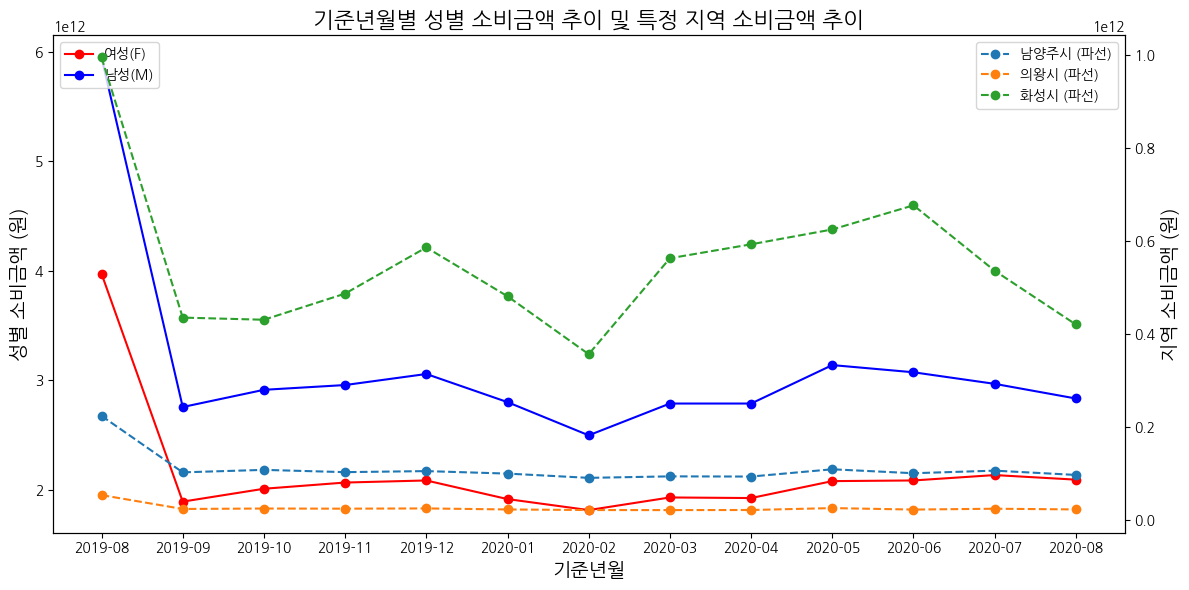

In [81]:
#여기에 코드를 입력해주세요.
import matplotlib.pyplot as plt

# 기준년월 및 성별코드별 소비금액 합계 계산
gender_monthly_sum = merged_df.groupby(['기준년월', '성별코드'])['사용금액'].sum().unstack()

# 기준년월 및 특정 지역별 소비금액 합계 계산
cities = ['남양주시', '의왕시', '화성시']
city_monthly_sum = merged_df[merged_df['시군구명'].isin(cities)].groupby(['기준년월', '시군구명'])['사용금액'].sum().unstack()

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(12, 6))

# 첫 번째 Y축: 성별코드별 소비금액 추이 (실선)
ax1.plot(gender_monthly_sum.index, gender_monthly_sum['F'], marker='o', linestyle='-', color='red', label='여성(F)')
ax1.plot(gender_monthly_sum.index, gender_monthly_sum['M'], marker='o', linestyle='-', color='blue', label='남성(M)')
ax1.set_ylabel('성별 소비금액 (원)', fontsize=14)
ax1.set_xlabel('기준년월', fontsize=14)
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left', fontsize=10)

# 두 번째 Y축: 지역별 소비금액 추이 (파선)
ax2 = ax1.twinx()  # 두 번째 Y축 공유
for city in cities:
    ax2.plot(city_monthly_sum.index, city_monthly_sum[city], marker='o', linestyle='--', label=f'{city} (파선)')
ax2.set_ylabel('지역 소비금액 (원)', fontsize=14)
ax2.tick_params(axis='y', labelcolor='black')

# 범례 추가
ax2.legend(loc='upper right', fontsize=10)

# 그래프 제목 및 설정
plt.title('기준년월별 성별 소비금액 추이 및 특정 지역 소비금액 추이', fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



---



#4. 데이터 해석 및 인사이트 도출

원하던 시각화 자료가 완성되었네요! 이제 이 자료를 토대로 인사이트를 도출하는 방법을 배워봅시다!

<img src = "https://datadiving.net/wp-content/uploads/2024/03/%EB%AC%B8%EC%A0%9C.png" width = "220">

❤️ **4-1**
* ChatGPT3.5는 이미지 삽입이 어렵기 때문에 율리우스(Julius)툴을 활용하여 데이터 인사이트 도출을 해봅시다.
* 위에서 작성한 **남성과 여성의 기준년월별 소비추이 그래프**를 해석하고, 데이터분석 목적에 맞는 (비즈니스)인사이트를 도출해봅시다.

<img src = "https://datadiving.net/wp-content/uploads/2024/03/chatGPT.png" width = "223">

🤖 **Julius 프롬프트**

1. 너는 이제부터 통신사에서 일하고 있는 데이터 분석팀 팀원이고, 내가 전달해주는 시각화 자료를 내 목적에 맞게 해석한 뒤 통신사 산업에 맞게 해석하여 인사이트를 전달해줘야 해.
시각화 자료를 그대로 해석한 것과, 인사이트를 각각 정리해서 목록형태로 알려줘.
알겠다고 대답하면 시각화 자료와 목적을 말해줄게.

2. {이미지 첨부하기}
내가 해결하고자 하는 문제는 아래와 같고, 성별이 소비금액과 관련이 있는지를 확인해보기 위해 시각화 했을 때 첨부한 이미지와 같은 결과가 나왔어.
/ 문제: 인구통계학적 특징에 따른 소비행태 파악을 통한 경기도 청년대상 통신 연계상품 기획